In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\david\anaconda3\envs\Dsci\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 45)

In [4]:
ab_ptax = pd.read_excel('data/AB_Ptax/2021_financial_year.xlsx', header=1,skiprows=[2], sheet_name='MR(1)-Residential')
ab_nrptax = pd.read_excel('data/AB_Ptax/2021_financial_year.xlsx', header=1, skiprows=[2], sheet_name='MR(2)-Non-Residential')

In [5]:
ab_nrptax.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,Education - Alberta School Foundation Fund Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Does your municipality have a Small Business Tax Bylaw?,"If yes, what is the Small Business Tax rate (expressed in mills) ?",Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land)
0,2021.0,City,3.0,AIRDRIE,10.17585,3.53893,0.0000,0.0,No,0.0,0.05428,No,0.0,2.100023
1,2021.0,City,19.0,BEAUMONT,9.94854,3.75881,0.0262,77900.0,No,0.0,0.02613,No,0.0,1.390000


In [6]:
ab_ptax.head(2)

,YEAR,STATUS,CODE,MUNICIPALITY,General Municipal Tax Rate,General Municipal Tax Rate (Farmland),Education - Alberta School Foundation Fund Tax Rate,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does your municipality have more than one residential tax rate?
0,2021.0,City,3.0,AIRDRIE,4.84559,4.84559,2.59814,0.0000,0.0,0.05428,No,0.0,2.100023,Yes
1,2021.0,City,19.0,BEAUMONT,7.14303,7.14303,2.57981,0.0262,77900.0,0.02613,No,0.0,1.390000,Yes


In [7]:
ab_ptax.shape, ab_nrptax.shape

((336, 14), (336, 14))

In [8]:
ab_nrptax.rename(columns={'MUNICIPALITY':'Municipality', 'YEAR':'Year', 'General Municipal Tax Rate':'NonResidential',  'Education - Alberta School Foundation Fund Tax Rate':'NonResidential_Education'}, inplace=True)
ab_nrptax.iloc[:, 4:6] = ab_nrptax.iloc[:, 4:6] * 0.001

In [9]:
ab_ptax.rename(columns={'MUNICIPALITY':'Municipality', 'YEAR':'Year','General Municipal Tax Rate':'Residential','General Municipal Tax Rate (Farmland)': 'Farm','Education - Alberta School Foundation Fund Tax Rate': 'Education'}, inplace=True)
ab_ptax.iloc[:, 4:7] = ab_ptax.iloc[:,4:7] * 0.001

In [10]:
ab_ptax = pd.concat([ab_ptax, ab_nrptax[['NonResidential', 'NonResidential_Education']]], axis=1)
ab_ptax['ResidentialTotalTax'] = ab_ptax['Residential'] + ab_ptax['Education']
ab_ptax['NonResidentialTotalTax'] = ab_ptax['NonResidential'] + ab_ptax['NonResidential_Education']
ab_ptax['FarmTotalTax'] = ab_ptax['Farm'] + ab_ptax['Education']

In [11]:
ab_ptax['TaxRatio NonRes/Res'] = ab_ptax['NonResidential']/ab_ptax['Residential']
ab_ptax['TaxRatio Farm/Residential'] = ab_ptax['Farm']/ab_ptax['Residential']

In [12]:
ab_ptax.reset_index(inplace=True, drop=True)
ab_ptax.head()

,Year,STATUS,CODE,Municipality,Residential,Farm,Education,Allowance for Non-collection of Requisitioned Tax Rate,Allowance For Non-Collection of Requisitioned Taxes ($),Seniors Lodge Accommodation Tax Rate,Does Your Municipality Levy a Minimum Tax?,What is the Amount of the Minimum Tax ($),Linked tax ratio (auto populated: non-residential divided by residential/farm land),Does your municipality have more than one residential tax rate?,NonResidential,NonResidential_Education,ResidentialTotalTax,NonResidentialTotalTax,FarmTotalTax,TaxRatio NonRes/Res,TaxRatio Farm/Residential
0,2021.0,City,3.0,AIRDRIE,0.004846,0.004846,0.002598,0.0000,0.0,0.054280,No,0.0,2.100023,Yes,0.010176,0.003539,0.007444,0.013715,0.007444,2.100023,1.00000
1,2021.0,City,19.0,BEAUMONT,0.007143,0.007143,0.002580,0.0262,77900.0,0.026130,No,0.0,1.390000,Yes,0.009949,0.003759,0.009723,0.013707,0.009723,1.392762,1.00000
2,2021.0,City,43.0,BROOKS,0.008411,0.008411,0.002587,0.0000,0.0,0.091507,No,0.0,1.417468,Yes,0.011922,0.004037,0.010998,0.015959,0.010998,1.417468,1.00000
3,2021.0,City,46.0,CALGARY,0.004825,0.014432,0.002582,0.0000,2621.0,0.000000,No,0.0,3.422383,No,0.016513,0.004095,0.007407,0.020608,0.017014,3.422383,2.99113
4,2021.0,City,48.0,CAMROSE,0.008846,0.008846,0.002655,0.0000,0.0,0.005400,No,0.0,1.483885,Yes,0.013126,0.003906,0.011501,0.017032,0.011501,1.483885,1.00000


In [13]:
edmonton_metro = ['EDMONTON', 'LEDUC', 'BEAUMONT', 'DEVON', 'SPRUCE GROVE', 'STONEY PLAIN', 'ST. ALBERT', 'MORNVILLE', 'FORT SASKATCHEWAN', 'LEDUC COUNTY', 'PARKLAND COUNTY', 'STURGEON COUNTY', 'STRATHCONA COUNTY']

In [14]:
edmonton_df = ab_ptax[ab_ptax['Municipality'].isin(edmonton_metro)].copy()
edmonton_df = edmonton_df[['Year', 'Municipality', 'Residential', 'Education','Farm','NonResidential', 'NonResidential_Education', 'ResidentialTotalTax', 'FarmTotalTax', 'NonResidentialTotalTax', 'TaxRatio NonRes/Res', 'TaxRatio Farm/Residential']]

In [15]:
calgary_metro = ['CALGARY','OKOTOKS','HIGH RIVER', 'COCHRANE', 'AIRDRIE', 'STRATHMORE', 'CHESTERMERE', 'FOOTHILLS COUNTY','ROCKVIEW COUNTY', 'WHEATLAND COUNTY']

In [16]:
calgary_df = ab_ptax[ab_ptax['Municipality'].isin(calgary_metro)].copy()
calgary_df = calgary_df[['Year', 'Municipality', 'Residential', 'Education','Farm','NonResidential', 'NonResidential_Education', 'ResidentialTotalTax', 'FarmTotalTax', 'NonResidentialTotalTax', 'TaxRatio NonRes/Res', 'TaxRatio Farm/Residential']]

In [17]:
edmonton_df.reset_index(inplace=True, drop=True)
edmonton_df.head()

,Year,Municipality,Residential,Education,Farm,NonResidential,NonResidential_Education,ResidentialTotalTax,FarmTotalTax,NonResidentialTotalTax,TaxRatio NonRes/Res,TaxRatio Farm/Residential
0,2021.0,BEAUMONT,0.007143,0.002580,0.007143,0.009949,0.003759,0.009723,0.009723,0.013707,1.392762,1.000000
1,2021.0,EDMONTON,0.007011,0.002493,0.007011,0.019979,0.004100,0.009504,0.009504,0.024079,2.849734,1.000000
2,2021.0,FORT SASKATCHEWAN,0.005751,0.002631,0.005751,0.009922,0.004055,0.008382,0.008382,0.013977,1.725311,1.000000
3,2021.0,LEDUC,0.007594,0.002616,0.008541,0.008541,0.004085,0.010210,0.011157,0.012626,1.124704,1.124704
4,2021.0,SPRUCE GROVE,0.006725,0.002673,0.006725,0.009449,0.003877,0.009398,0.009398,0.013326,1.404990,1.000000


In [18]:
calgary_df.reset_index(inplace=True, drop=True)
calgary_df.head()

,Year,Municipality,Residential,Education,Farm,NonResidential,NonResidential_Education,ResidentialTotalTax,FarmTotalTax,NonResidentialTotalTax,TaxRatio NonRes/Res,TaxRatio Farm/Residential
0,2021.0,AIRDRIE,0.004846,0.002598,0.004846,0.010176,0.003539,0.007444,0.007444,0.013715,2.100023,1.000000
1,2021.0,CALGARY,0.004825,0.002582,0.014432,0.016513,0.004095,0.007407,0.017014,0.020608,3.422383,2.991130
2,2021.0,CHESTERMERE,0.005098,0.002577,0.005098,0.007239,0.003659,0.007675,0.007675,0.010898,1.420000,1.000000
3,2021.0,FOOTHILLS COUNTY,0.003836,0.002625,0.009568,0.008419,0.004021,0.006461,0.012193,0.012440,2.194769,2.494341
4,2021.0,WHEATLAND COUNTY,0.003632,0.002672,0.012691,0.008614,0.003950,0.006304,0.015363,0.012564,2.371837,3.494562


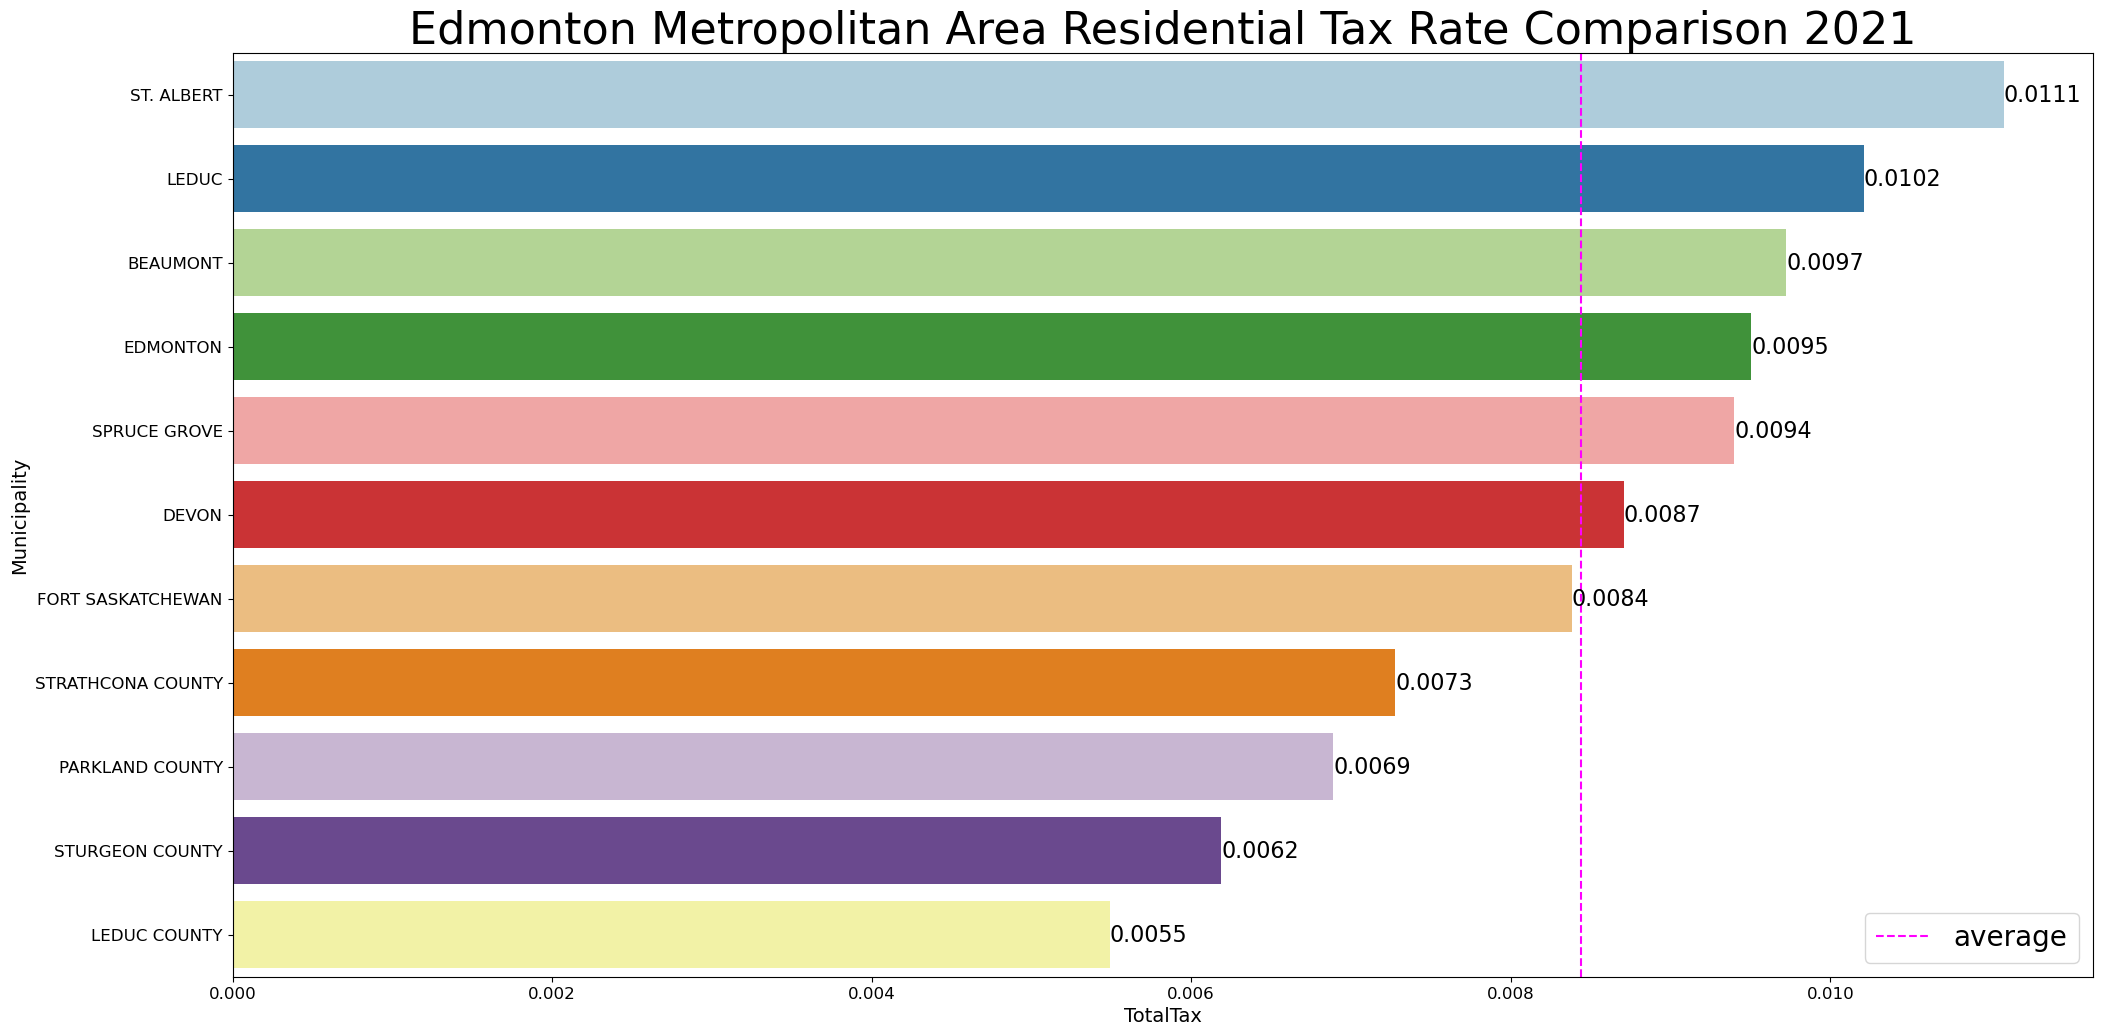

In [19]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='ResidentialTotalTax', ascending=False), y='Municipality', x='ResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('TotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metropolitan Area Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['ResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

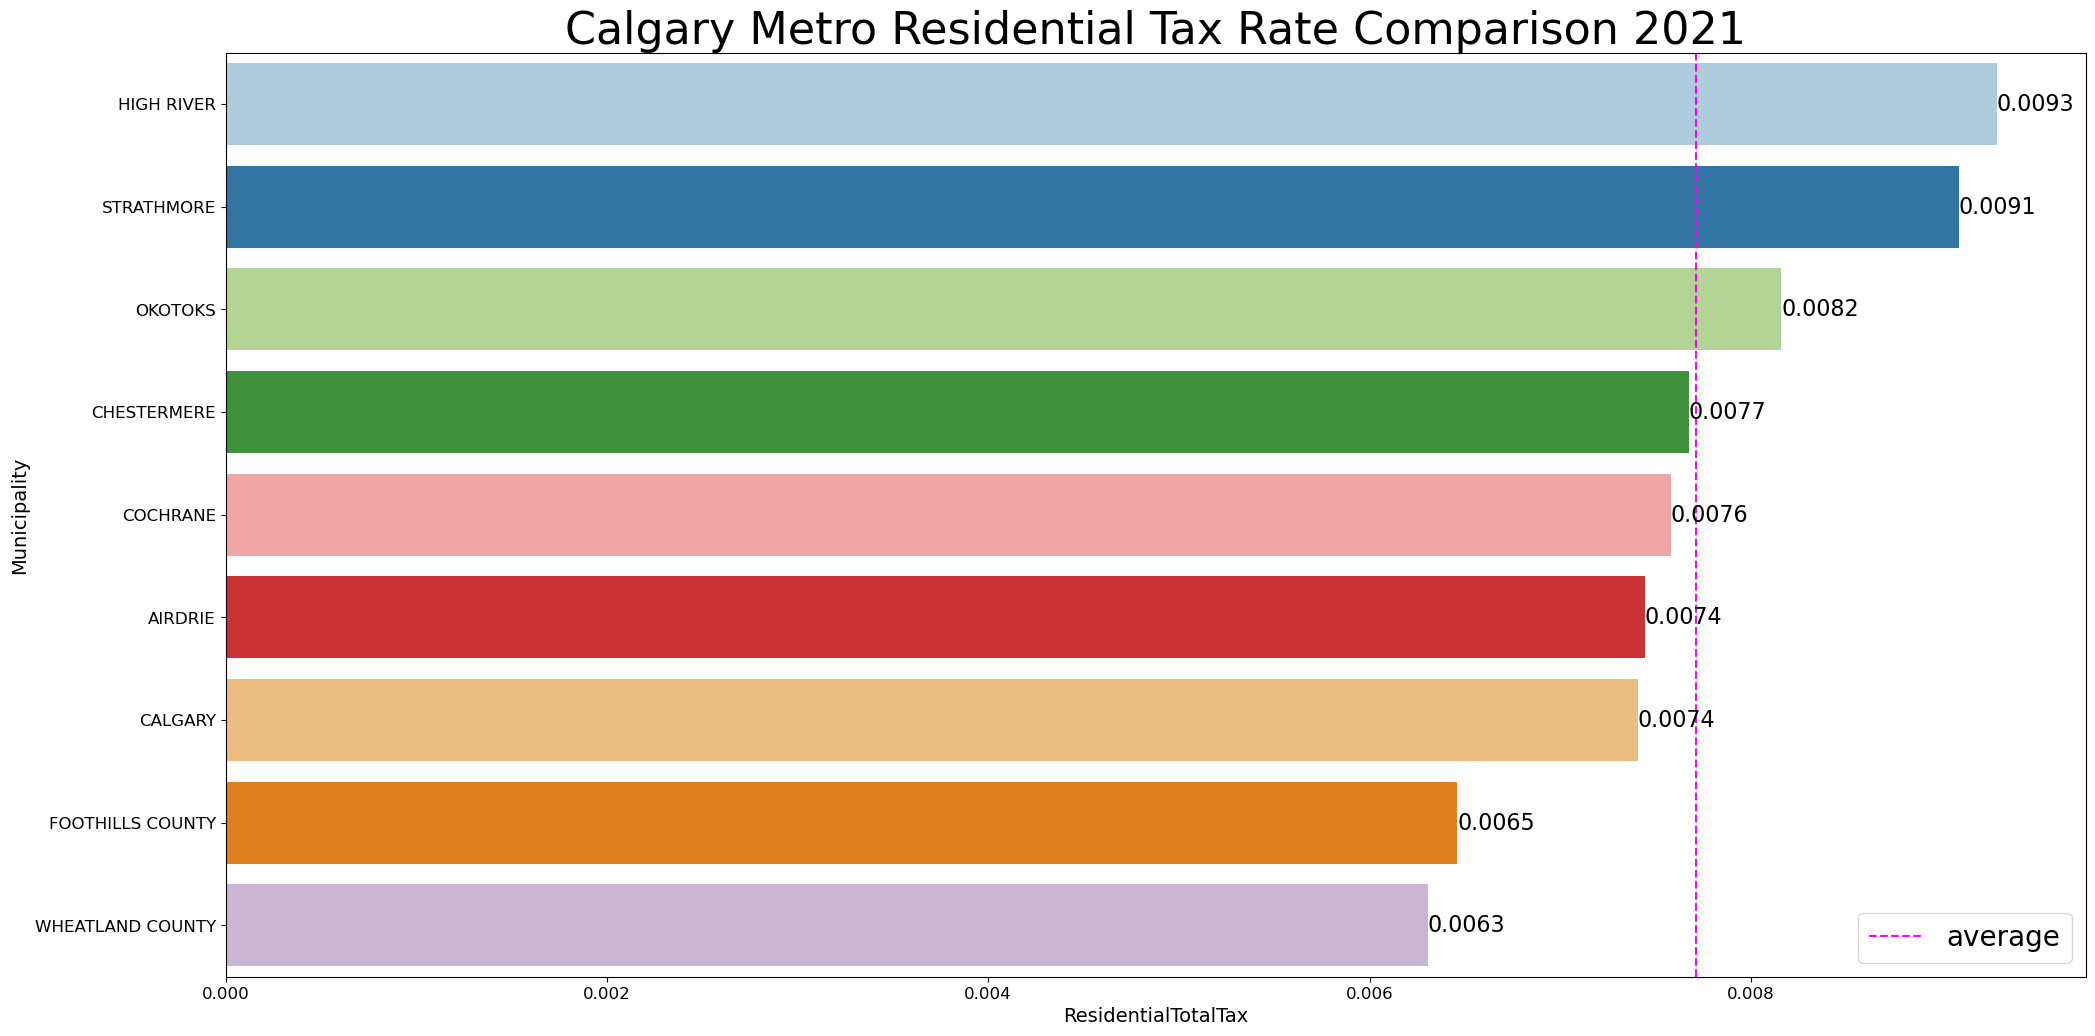

In [20]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=calgary_df.sort_values(by='ResidentialTotalTax', ascending=False), y='Municipality', x='ResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('ResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['ResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

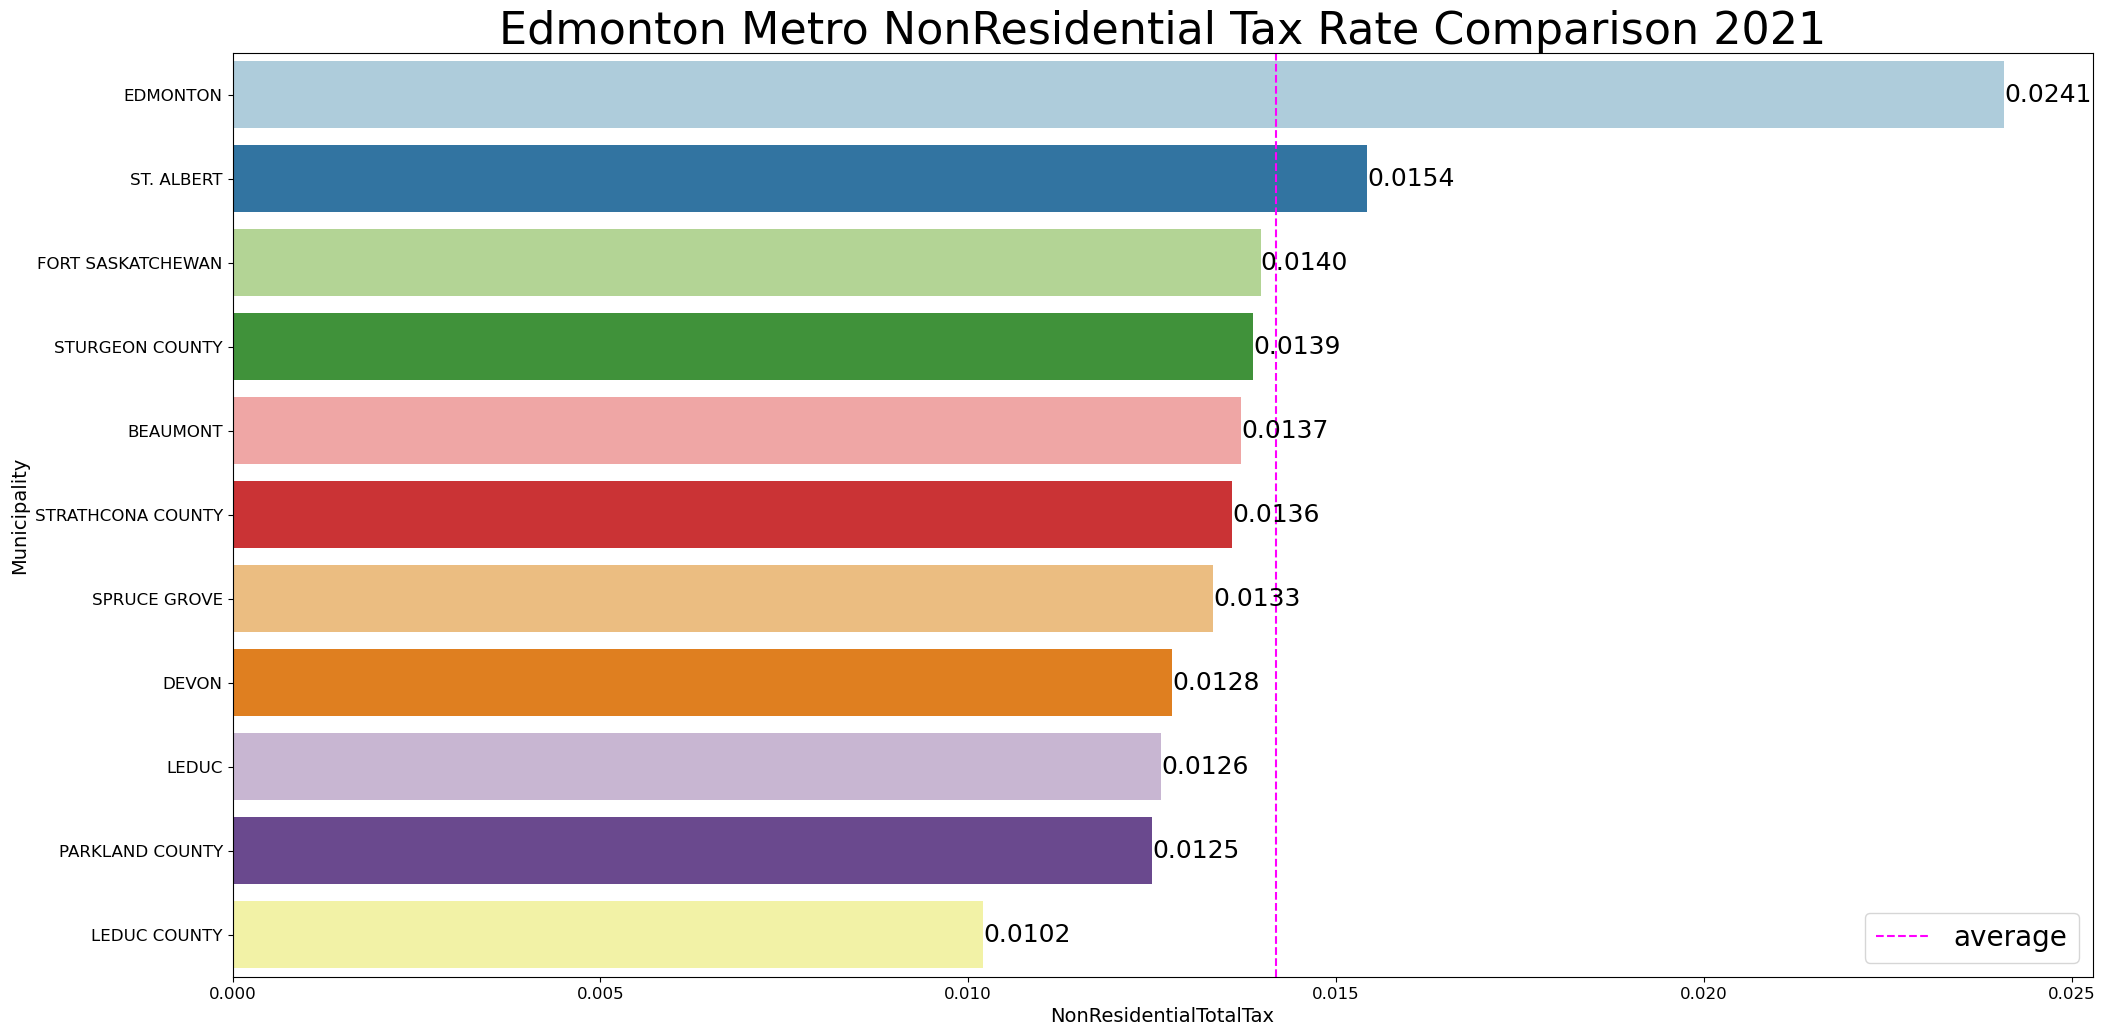

In [21]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='NonResidentialTotalTax', ascending=False), y='Municipality', x='NonResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro NonResidential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=18)
plt.axvline(edmonton_df['NonResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

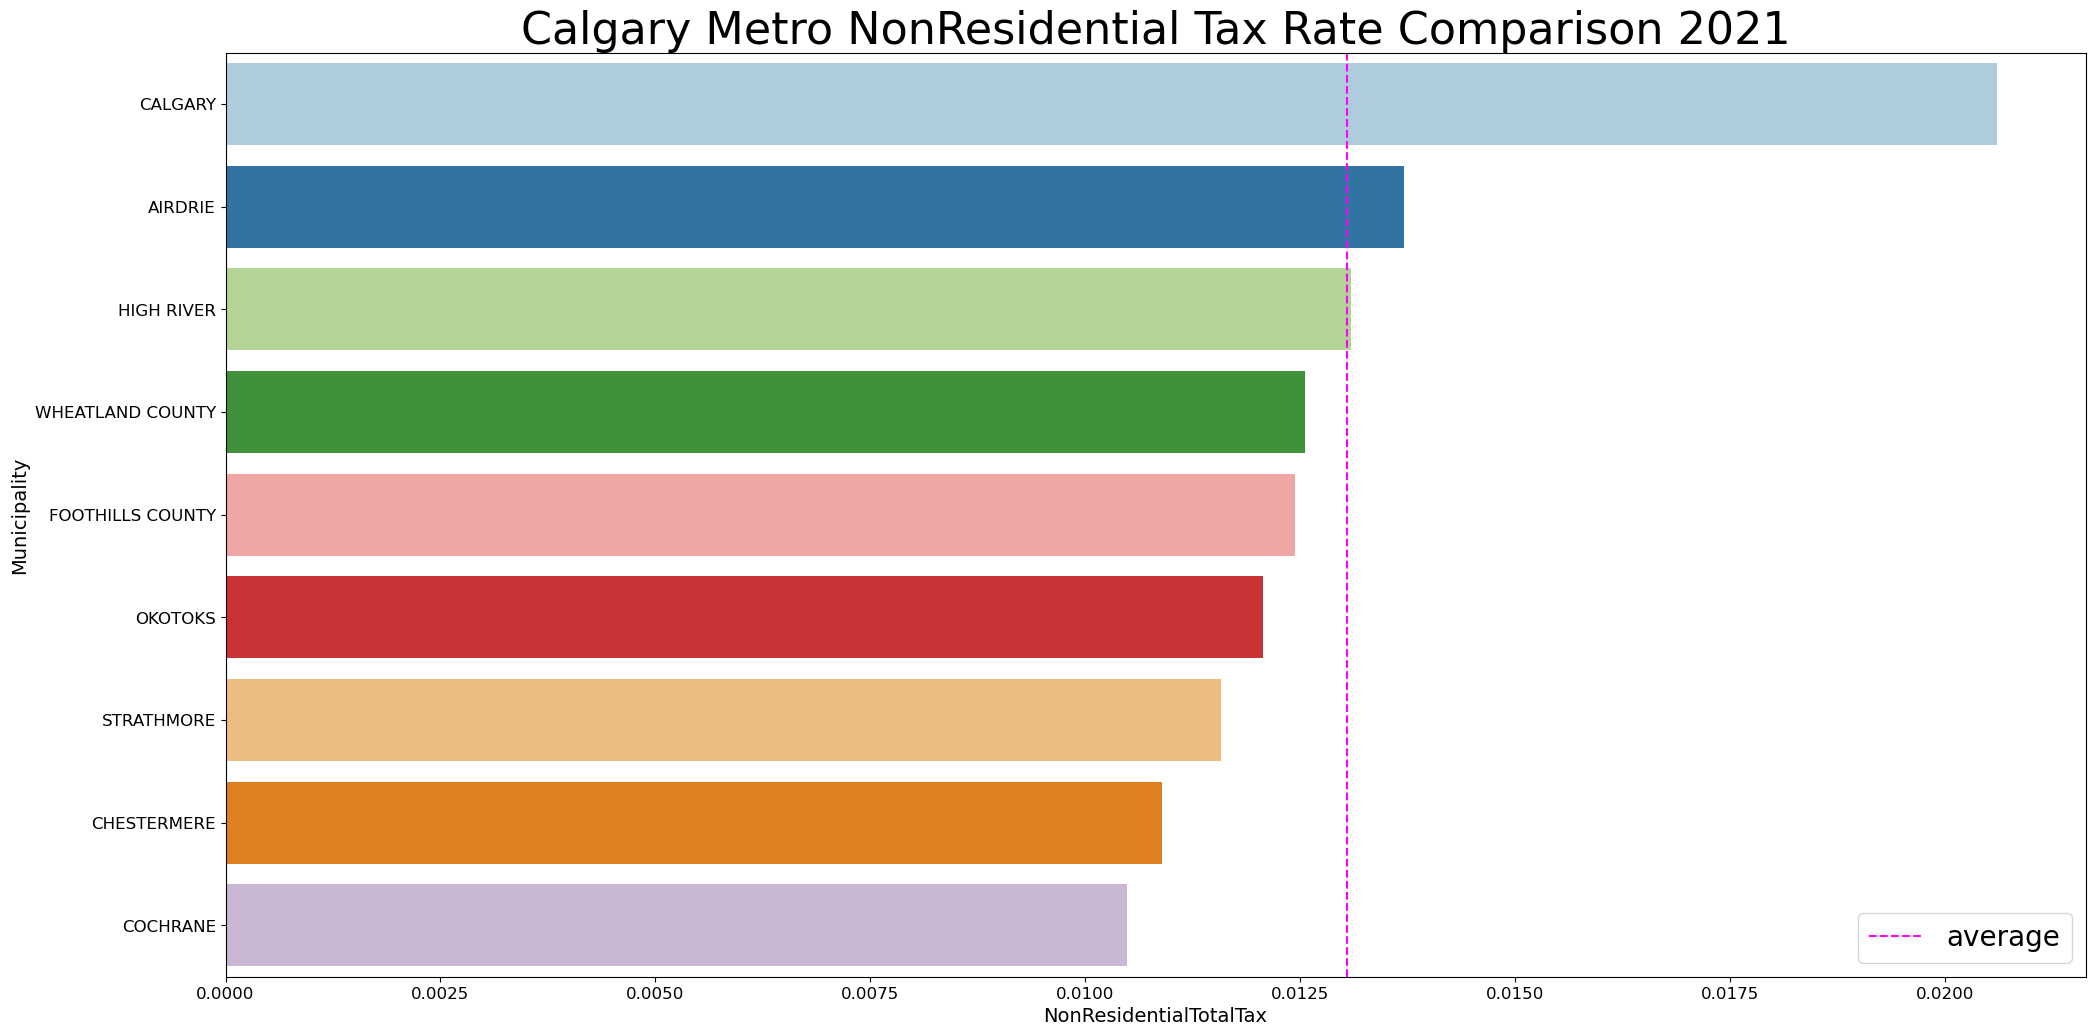

In [22]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=calgary_df.sort_values(by='NonResidentialTotalTax', ascending=False), y='Municipality', x='NonResidentialTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidentialTotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro NonResidential Tax Rate Comparison 2021', fontsize=32)
plt.axvline(calgary_df['NonResidentialTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

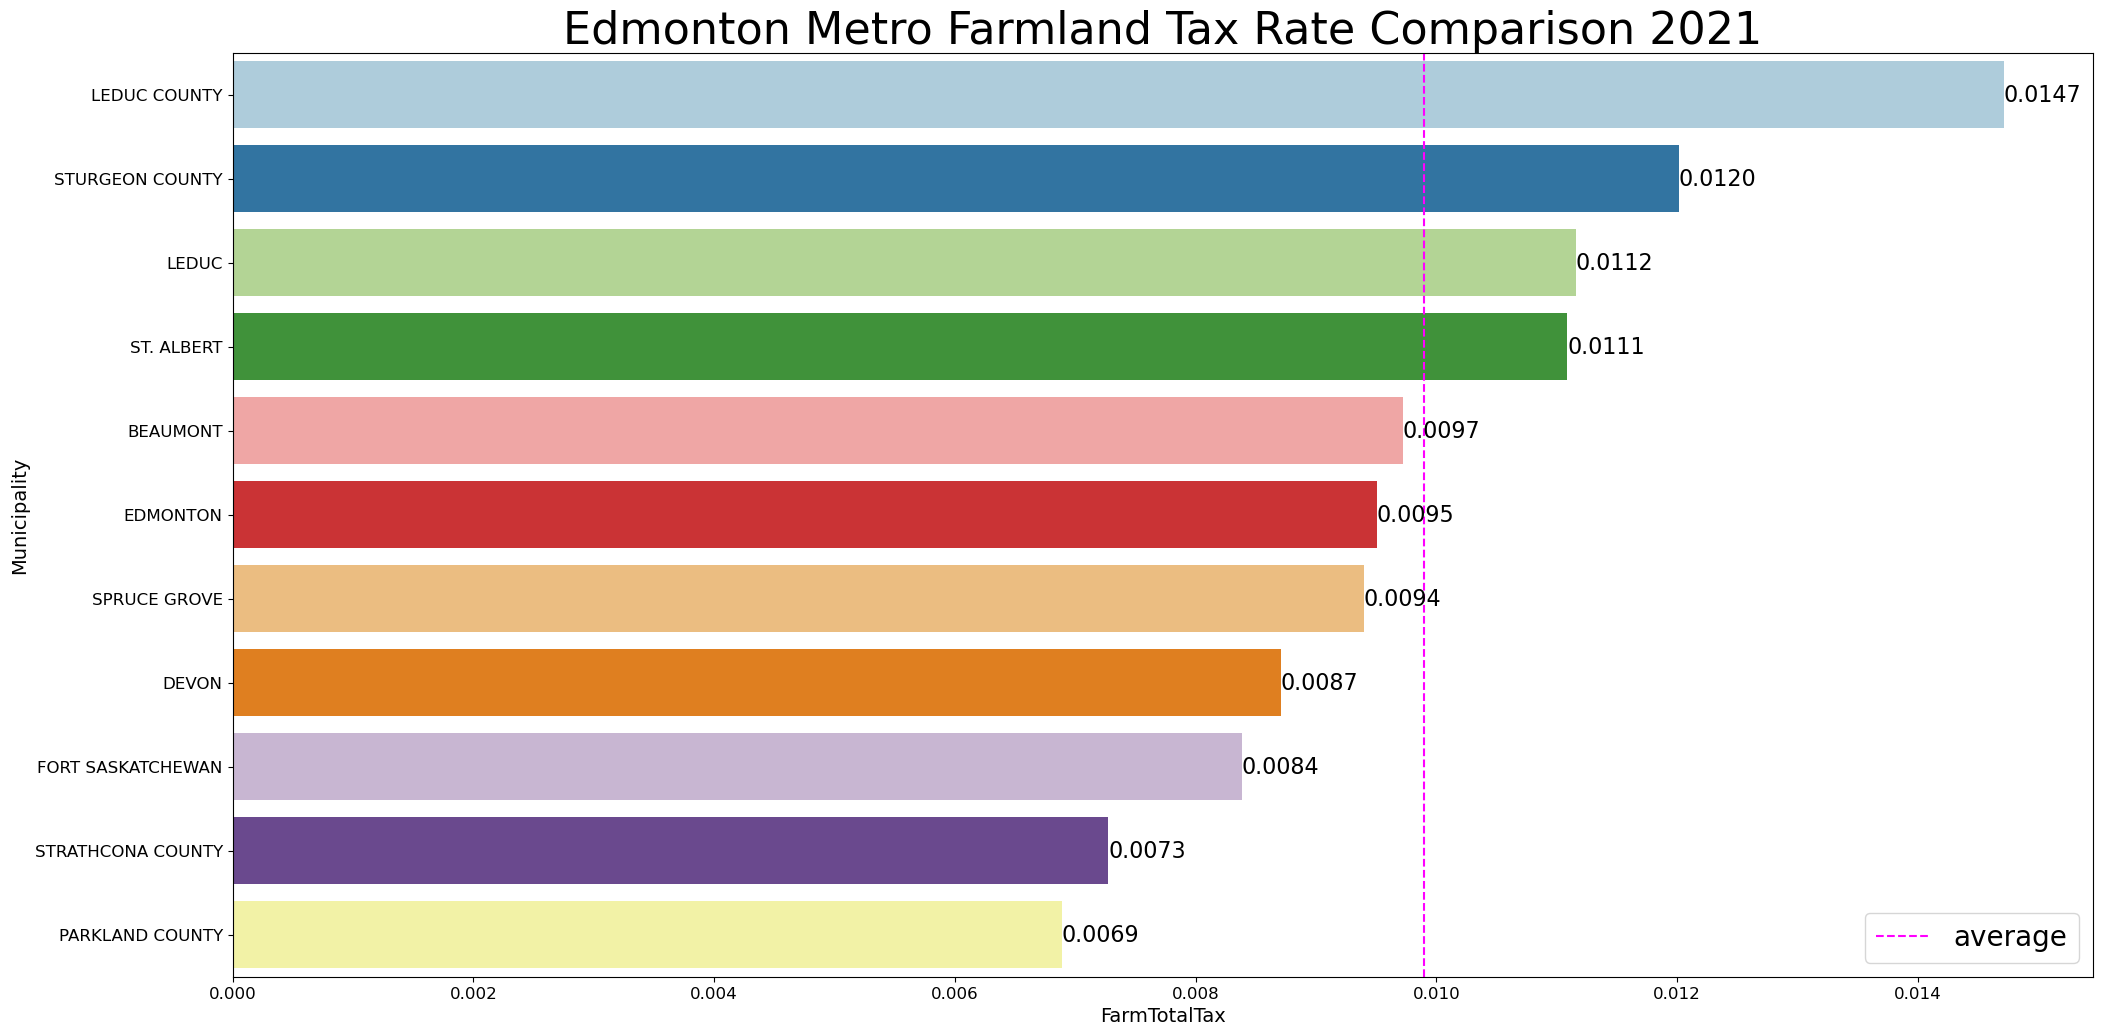

In [23]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='FarmTotalTax', ascending=False), y='Municipality', x='FarmTotalTax', orient='h', palette='Paired')
ax.set_xlabel('FarmTotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['FarmTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

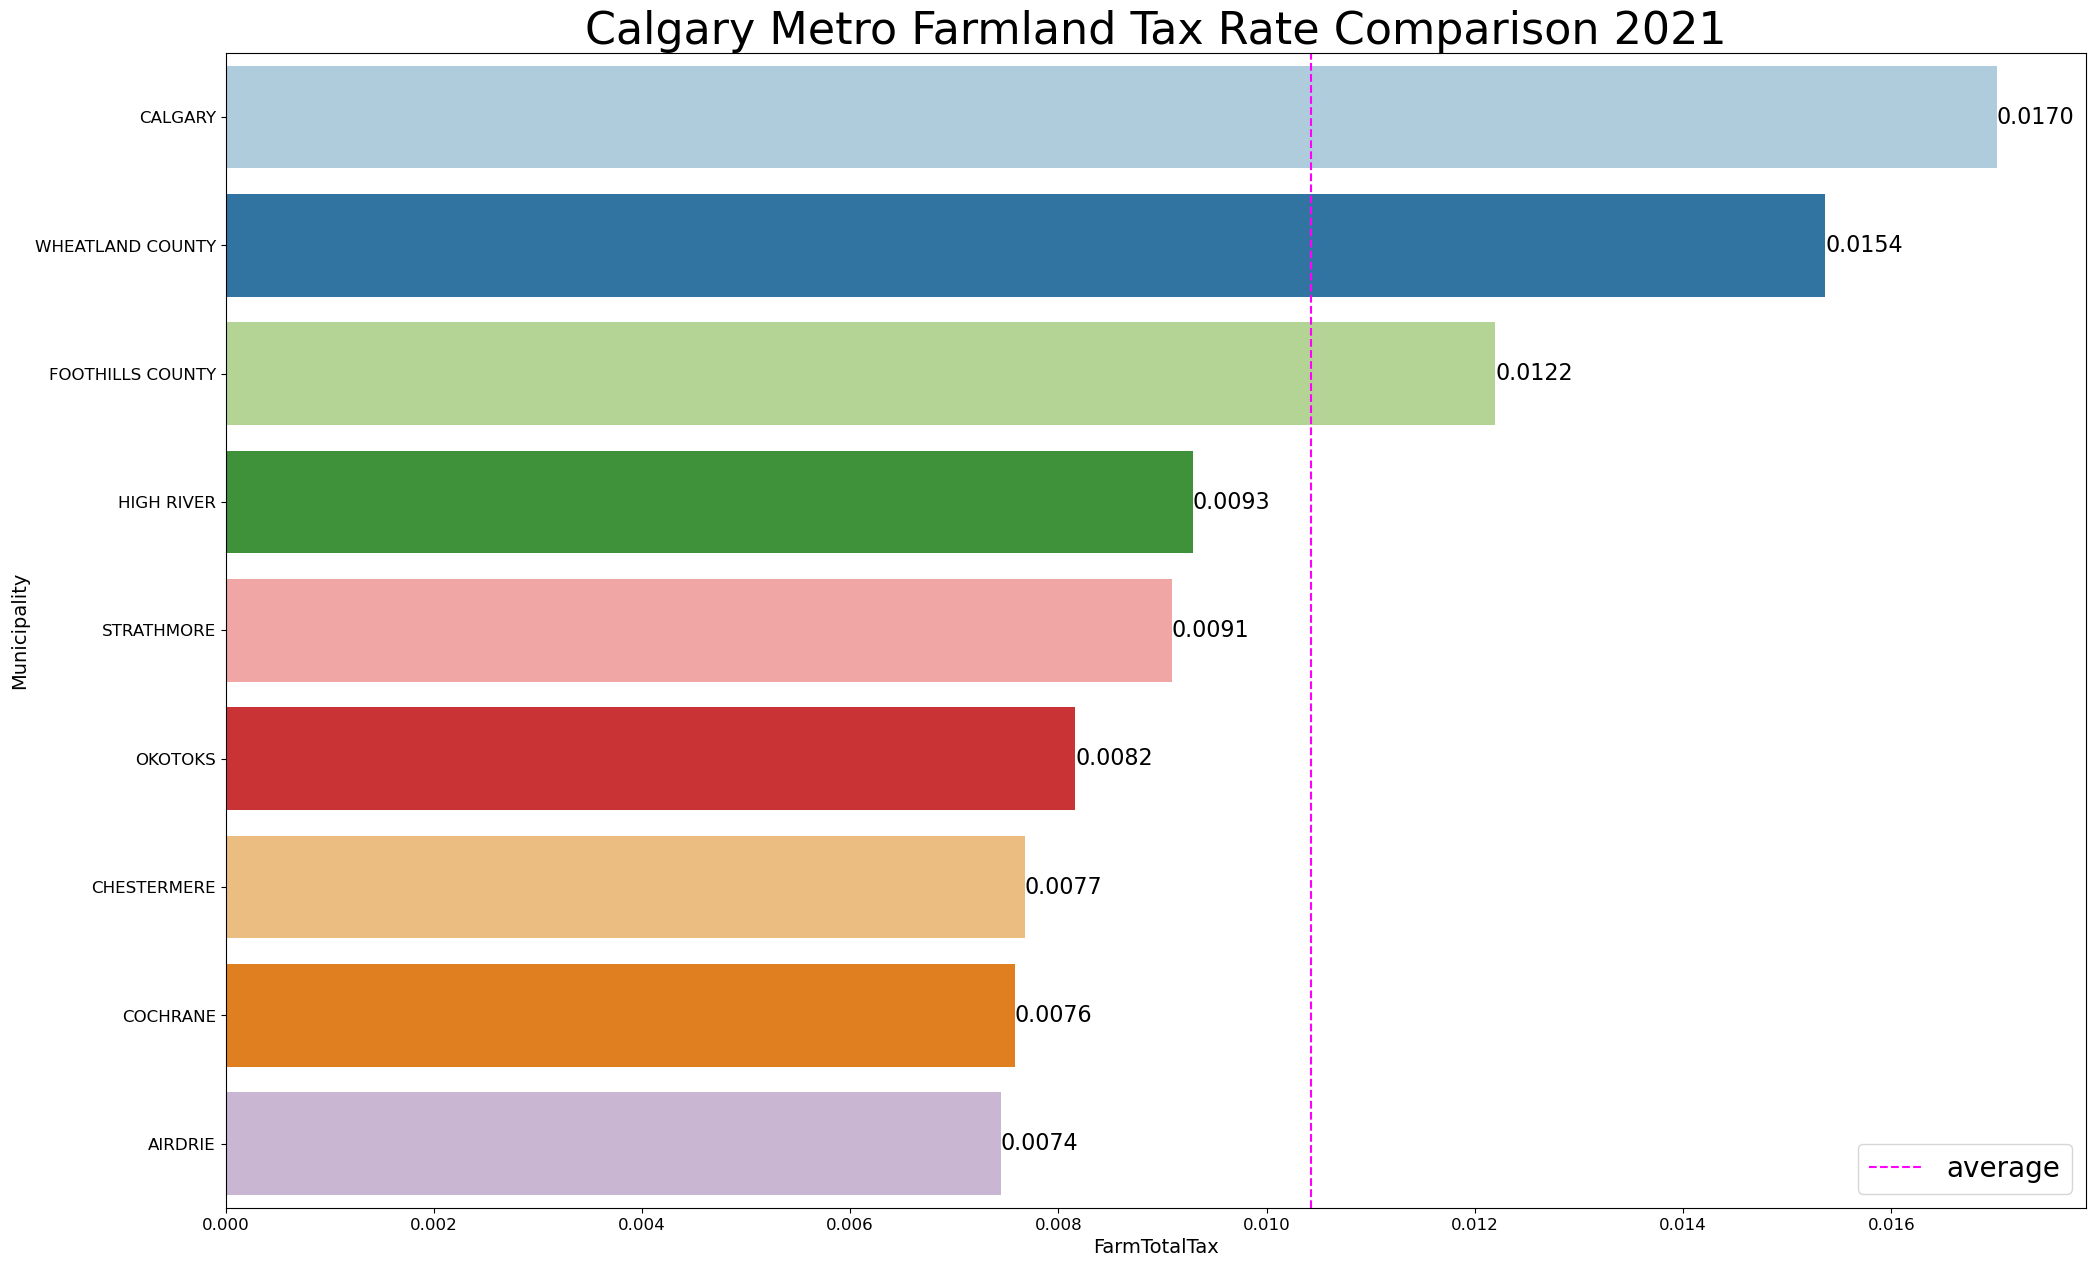

In [24]:
fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=calgary_df.sort_values(by='FarmTotalTax', ascending=False), y='Municipality', x='FarmTotalTax', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('FarmTotalTax', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['FarmTotalTax'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

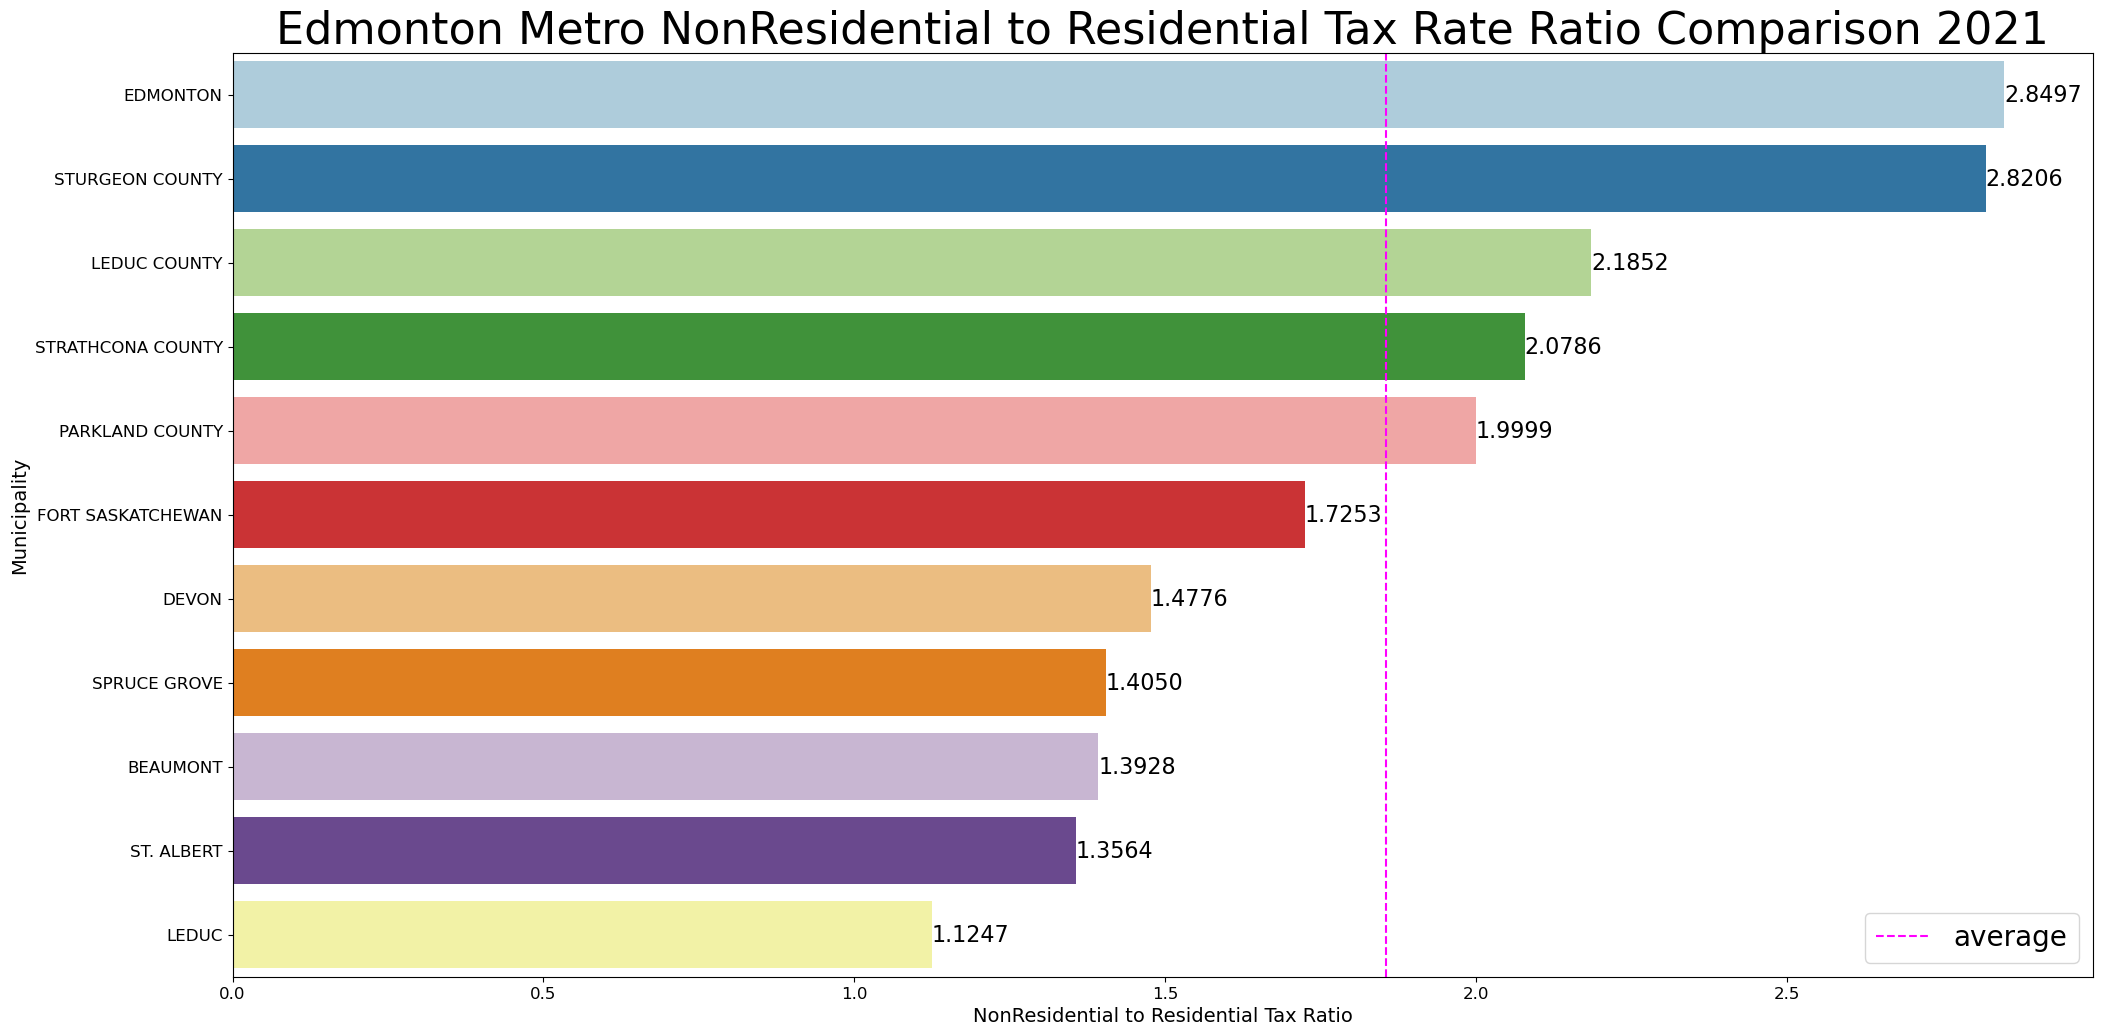

In [25]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=edmonton_df.sort_values(by='TaxRatio NonRes/Res', ascending=False), y='Municipality', x='TaxRatio NonRes/Res', orient='h', palette='Paired')
ax.set_xlabel('NonResidential to Residential Tax Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Edmonton Metro NonResidential to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(edmonton_df['TaxRatio NonRes/Res'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

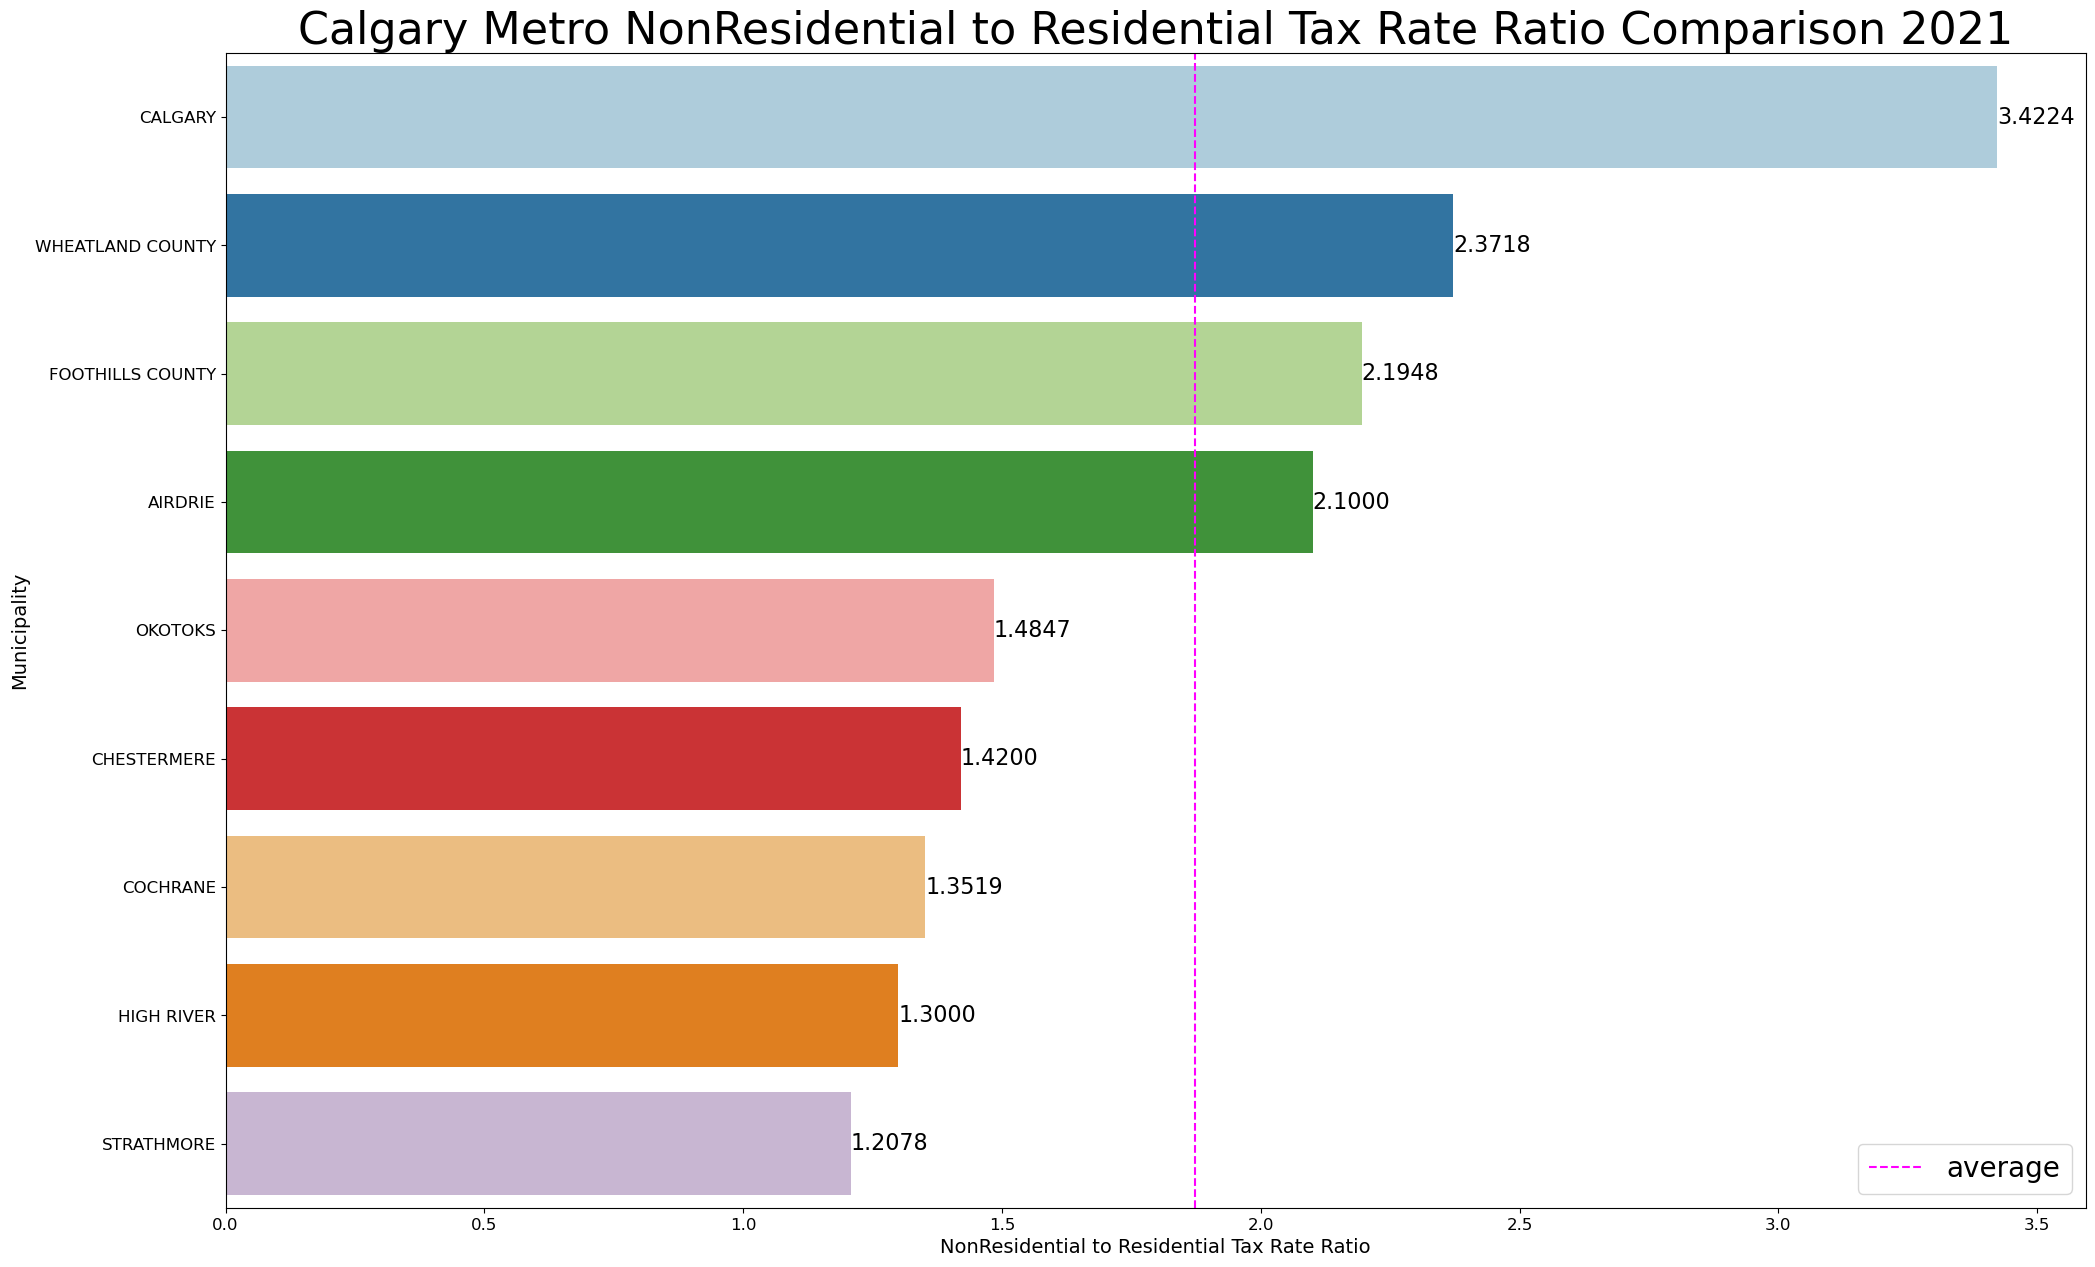

In [26]:
fig, ax = plt.subplots(figsize=(24,15))
fig = sns.barplot(data=calgary_df.sort_values(by='TaxRatio NonRes/Res', ascending=False), y='Municipality', x='TaxRatio NonRes/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('NonResidential to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Calgary Metro NonResidential to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(calgary_df['TaxRatio NonRes/Res'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc='lower right', prop={'size':20})
plt.show()

In [27]:
bc_ptax = pd.read_excel('data/BC_Ptax/schedule702_2021.xlsx', header=1)

In [28]:
bc_ptax.head(2)

,Municipalities,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry1,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm1
0,100 Mile House,D,CAR,Municipal,3.69159,40.00000,3.69159,57.32533,10.03854,8.18397,10.00421,3.25228,3.74765
1,100 Mile House,D,CAR,Reg'l District,1.24025,6.43799,1.24025,7.68252,4.02257,2.97290,3.63789,1.20596,1.24596


In [29]:
bc_ptax.shape

(966, 13)

In [30]:
bc_ptax.iloc[:,4:] = bc_ptax.iloc[:,4:] * 0.001

In [31]:
bc_ptax.rename(columns={'Municipalities': 'Municipality', 'Major Industry1':'Major Industry', 'Farm1':'Farm'}, inplace=True)

In [32]:
vancouver_metro = ['Vancouver', 'West Vancouver', 'North Vancouver - C', 'North Vancounver - D','Richmond', 'Delta', 'Surrey', 'Langley - C', 'Langley - D', 'Maple Ridge', 'Pitt Meadows', 'Port Coquitlam', 'Coquitlam', 'Port Moody', 'Burnaby', 'New Westminster', 'White Rock', 'Belcarra', 'Anmore', 'Bowen Island', 'Lions Bay']

In [33]:
vancouver_df = bc_ptax[bc_ptax['Municipality'].isin(vancouver_metro)]

In [34]:
#Test
vancouver_df[vancouver_df['Municipality'] == 'Vancouver']

,Municipality,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm
888,Vancouver,C,GVR,Municipal,0.001602,0.028334,0.000000e+00,0.033319,0.004915,0.004915,0.000000,0.001599,0.001599
889,Vancouver,C,GVR,Reg'l District,0.000054,0.000189,5.403000e-05,0.000184,0.000184,0.000132,0.000000,0.000054,0.000054
890,Vancouver,C,GVR,Hospital,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891,Vancouver,C,GVR,School,0.000965,0.012860,1.000000e-04,0.003860,0.003860,0.003860,0.001900,0.002330,0.006910
892,Vancouver,C,GVR,Other,0.000300,0.002837,2.000000e-07,0.001999,0.001054,0.000983,0.000232,0.000230,0.000398
893,Vancouver,C,GVR,Totals,0.002921,0.044220,1.542300e-04,0.039362,0.010012,0.009890,0.002132,0.004213,0.008961


In [35]:
vancouver_totals = vancouver_df[vancouver_df['Purpose of Tax Rate'] == 'Totals']

In [36]:
#Test
vancouver_totals.head(2)

,Municipality,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm
23,Anmore,V,GVR,Totals,0.003428,0.018669,0.000456,0.007259,0.006314,0.007384,0.003367,0.004503,0.007719
47,Belcarra,V,GVR,Totals,0.003559,0.022956,0.002126,0.012912,0.011966,0.009925,0.008355,0.004634,0.009382


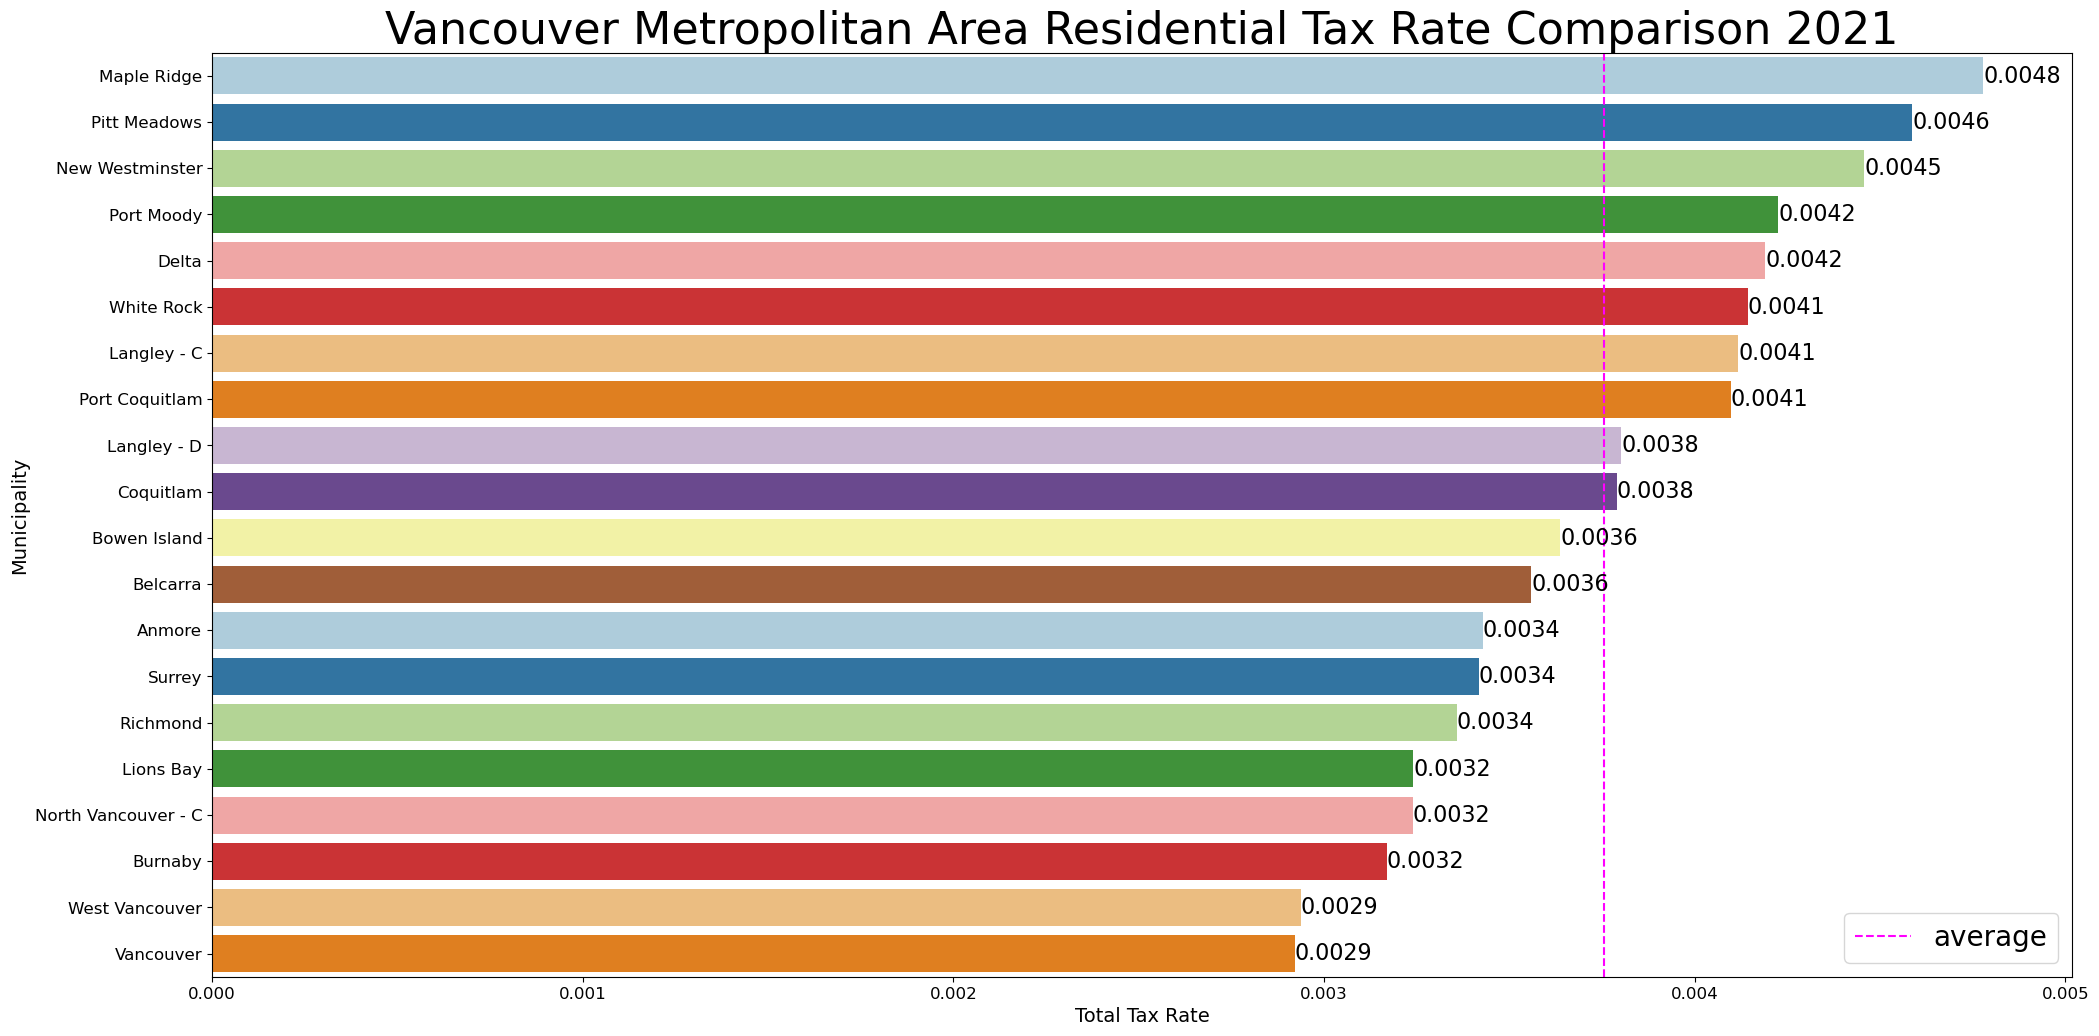

In [37]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Residential', ascending=False), y='Municipality', x='Residential', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metropolitan Area Residential Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Residential'].mean(), color='magenta', linestyle='dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

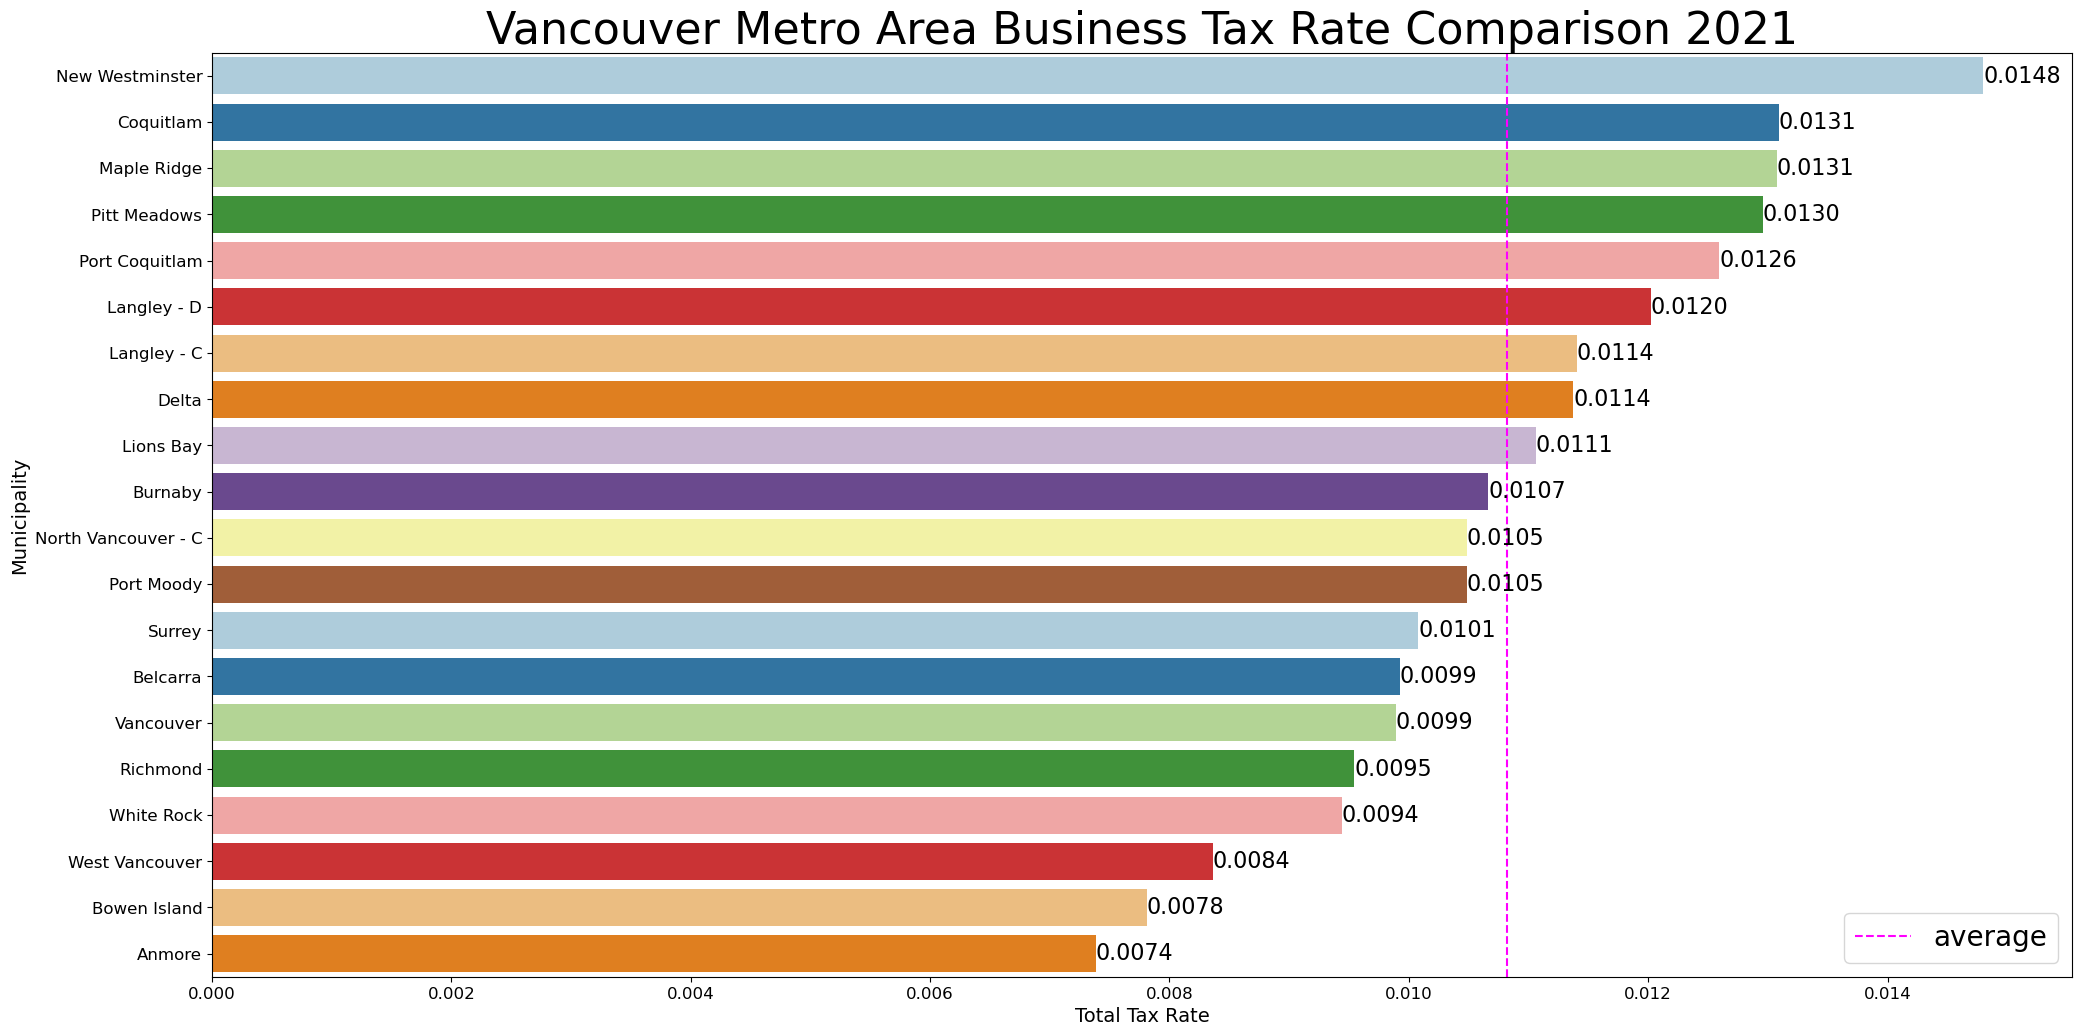

In [38]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Business', ascending=False), y='Municipality', x='Business', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Business Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Business'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [39]:
nonMind = ['White Rock', 'Lions Bay', 'Bowen Island', 'Anmore']
nonLind = ['West Vancouver', 'Lions Bay', 'Anmore']

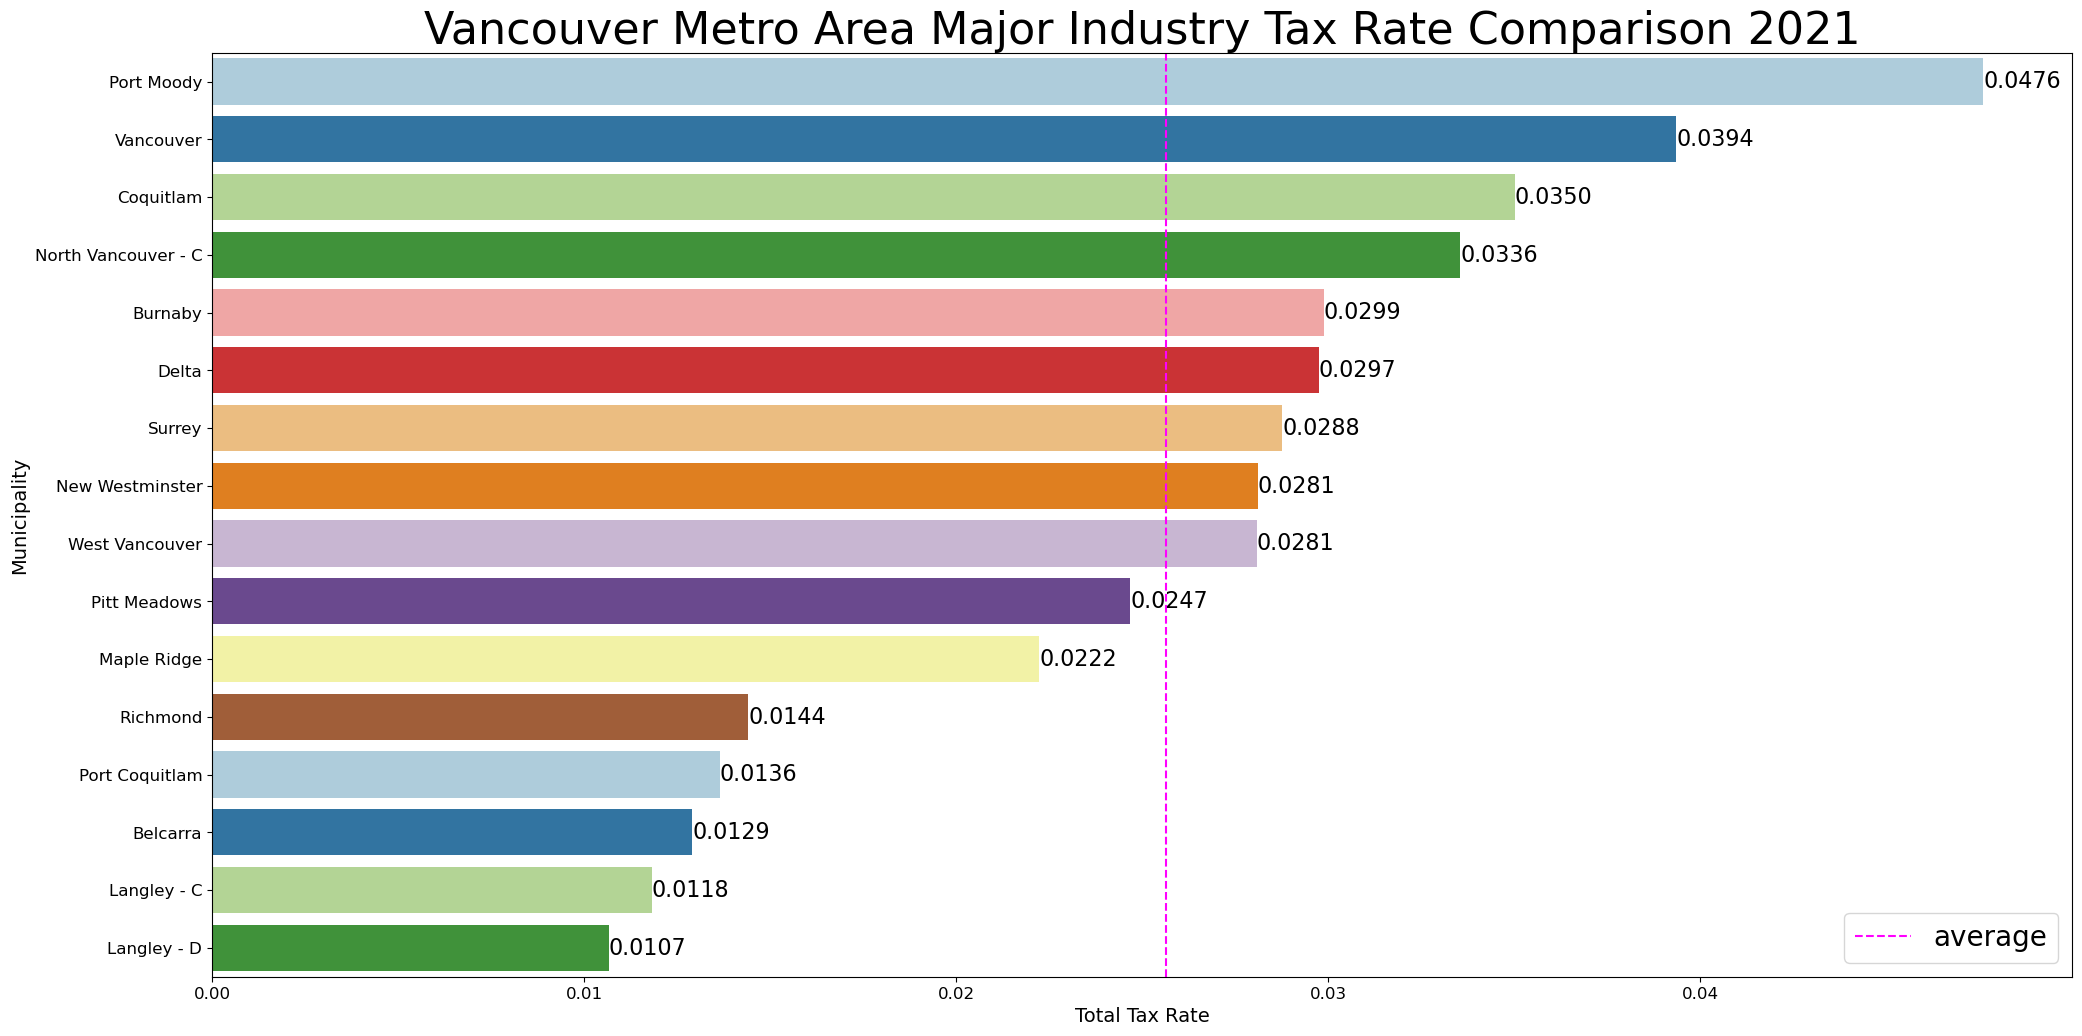

In [40]:
data = vancouver_totals[~vancouver_totals.isin(nonMind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Major Industry', ascending=False), y='Municipality', x='Major Industry', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Major Industry Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Major Industry'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

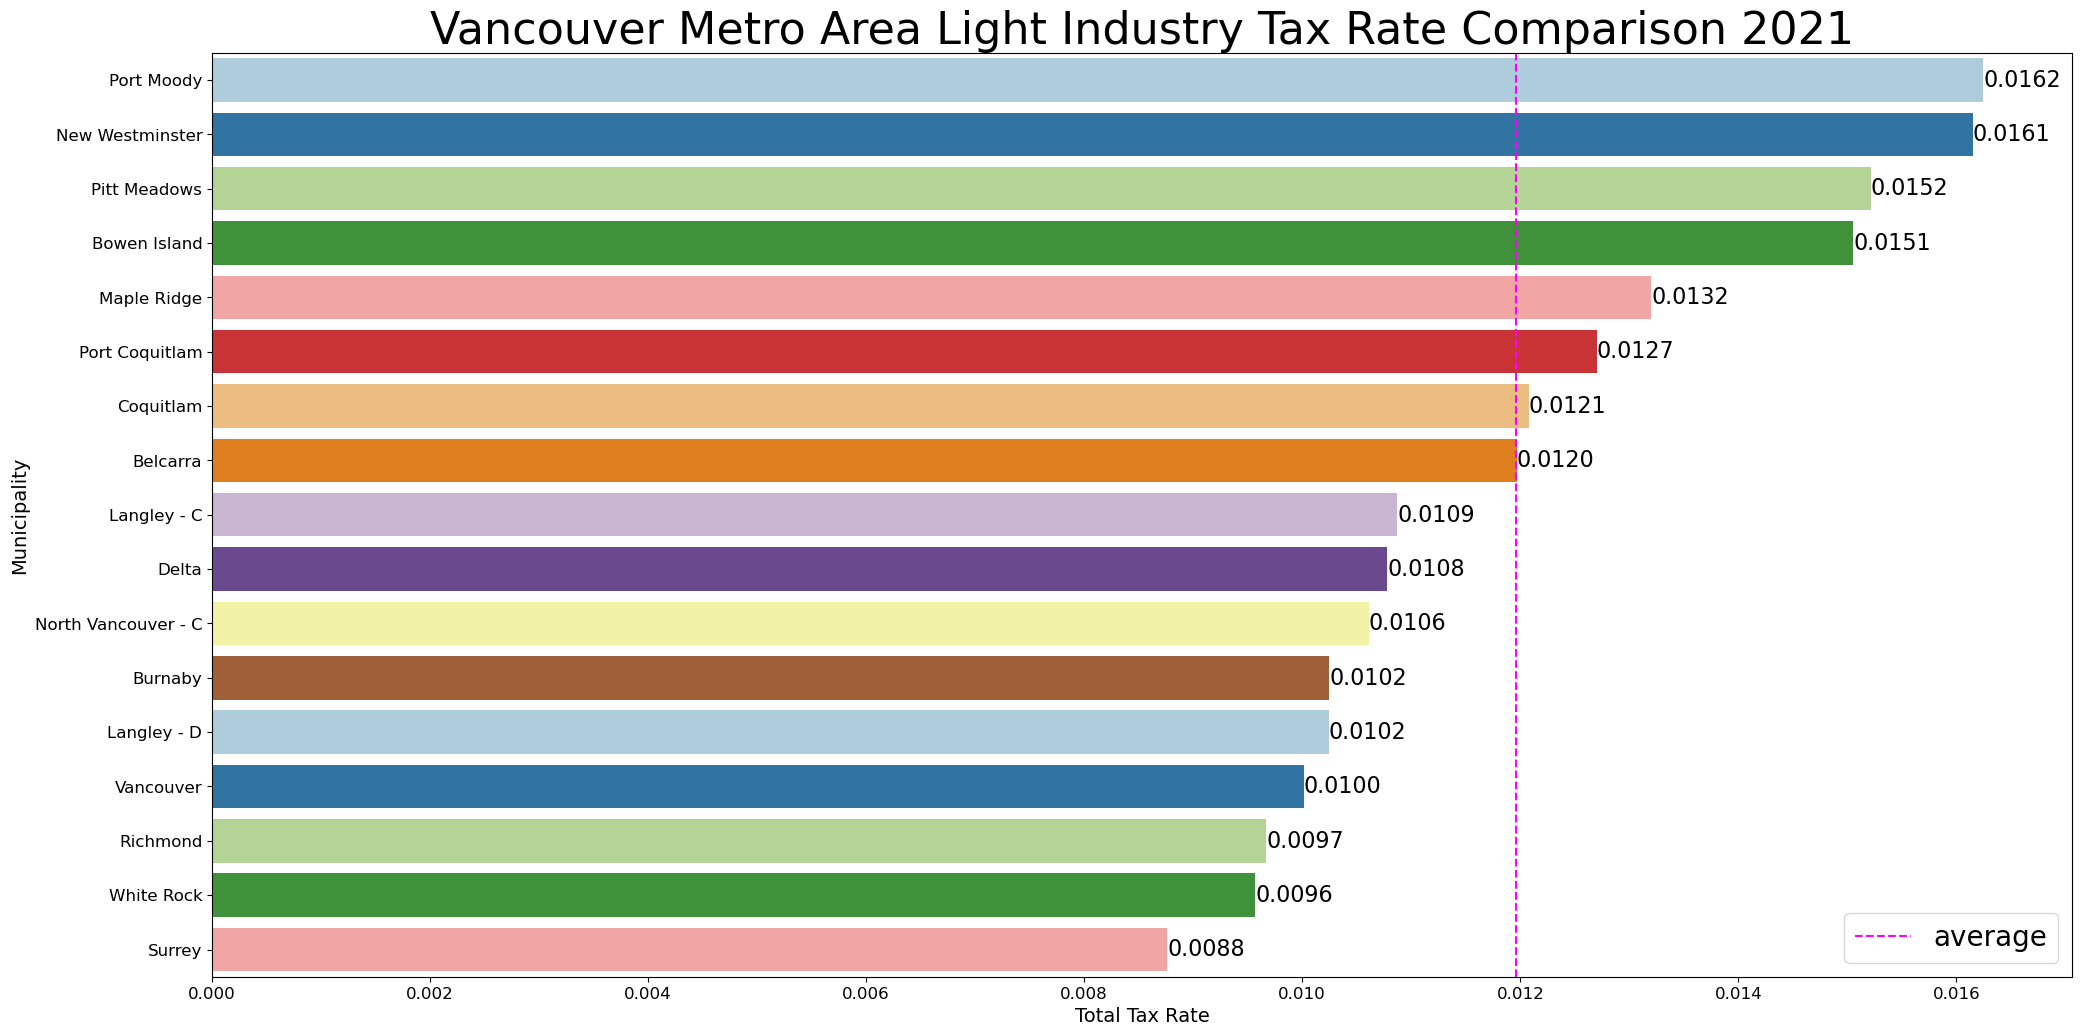

In [41]:
data = vancouver_totals[~vancouver_totals.isin(nonLind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='Light Industry', ascending=False), y='Municipality', x='Light Industry', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Light Industry Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['Light Industry'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

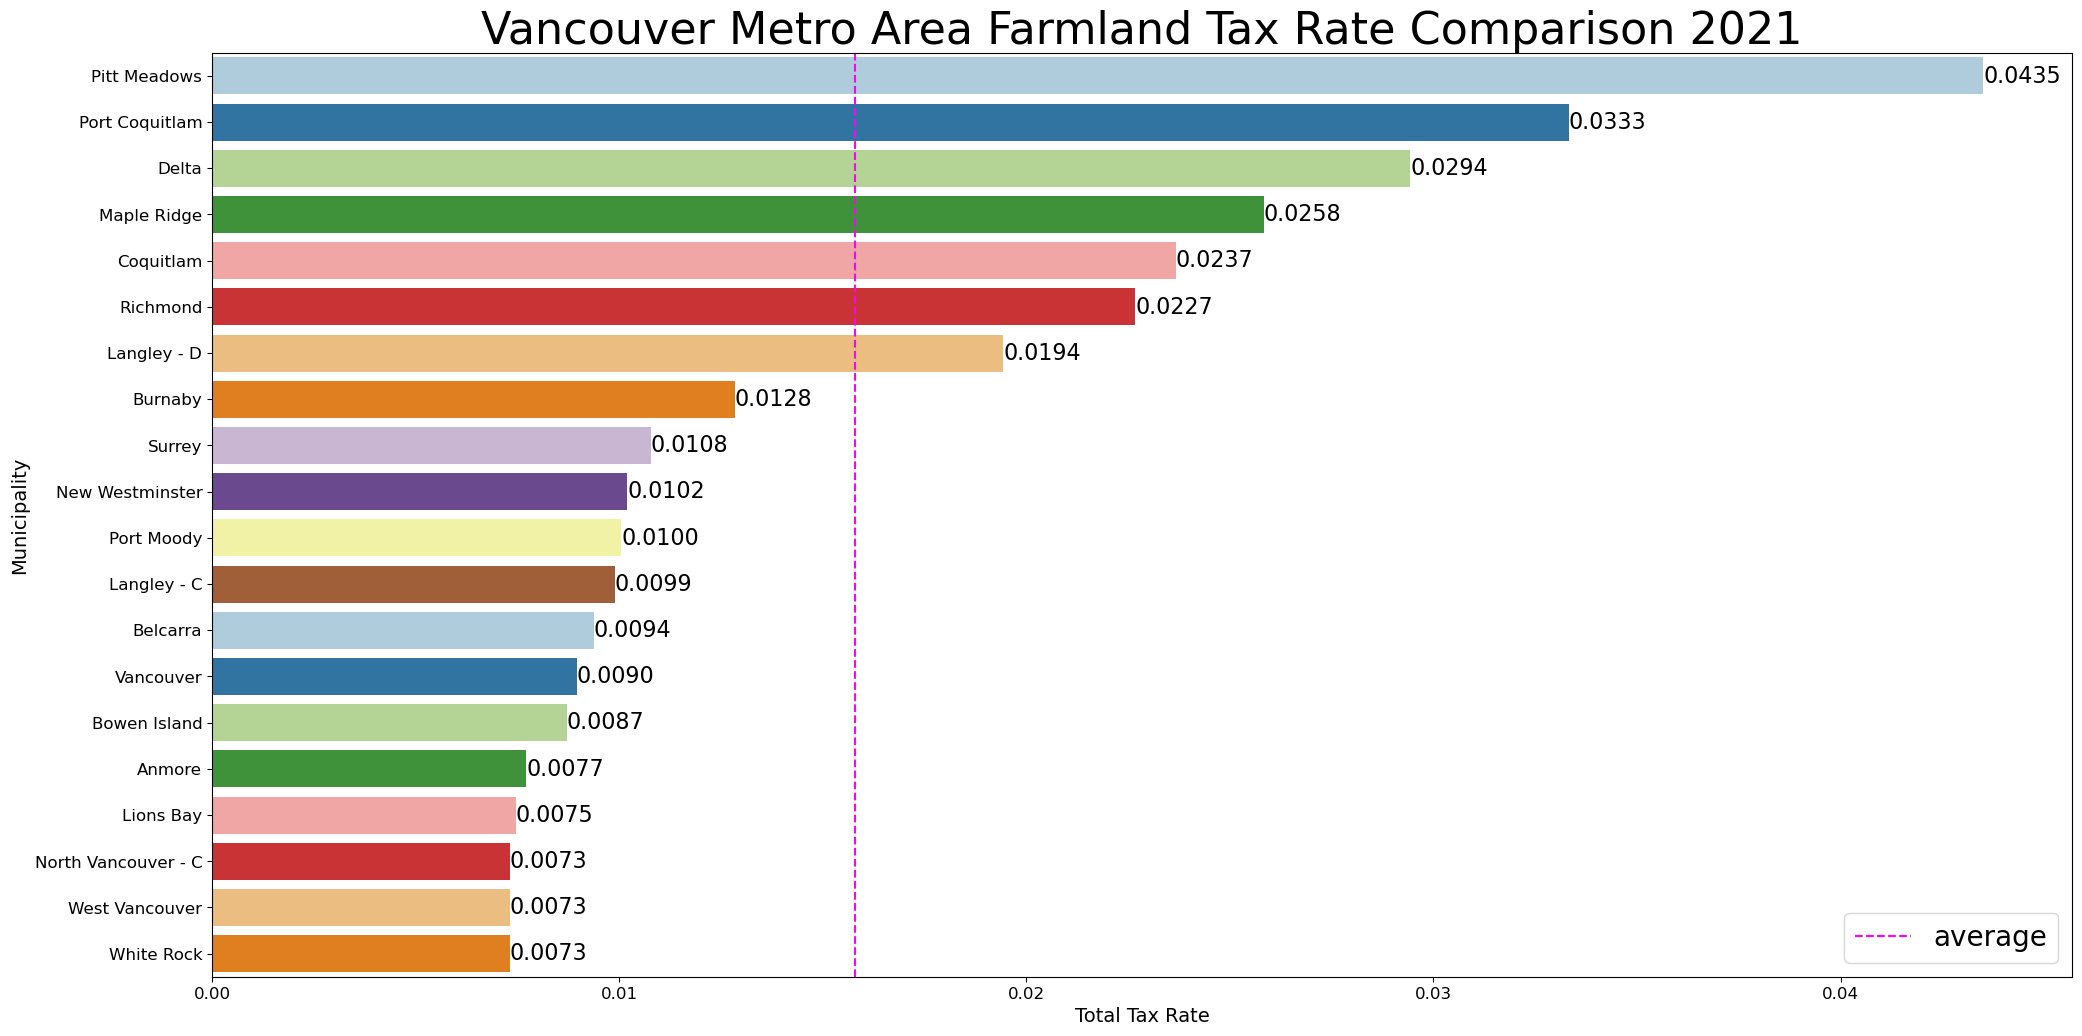

In [42]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_totals.sort_values(by='Farm', ascending=False), y='Municipality', x='Farm', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Total Tax Rate', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Area Farmland Tax Rate Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_totals['Farm'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [43]:
vancouver_muni = vancouver_df[vancouver_df['Purpose of Tax Rate'] == 'Municipal'].copy()

In [44]:
vancouver_muni['TaxRatio Bus/Res'] = vancouver_muni['Business']/vancouver_muni['Residential']
vancouver_muni['TaxRatio MajInd/Res'] = vancouver_muni['Major Industry']/vancouver_muni['Residential']
vancouver_muni['TaxRatio LiInd/Res'] = vancouver_muni['Light Industry']/vancouver_muni['Residential']

In [45]:
#test
vancouver_muni.head(2)

,Municipality,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm,TaxRatio Bus/Res,TaxRatio MajInd/Res,TaxRatio LiInd/Res
18,Anmore,V,GVR,Municipal,0.001532,0.001532,0.000000,0.000000,0.000000,0.001532,0.000000,0.001532,0.000000,1.00,0.000000,0.000000
42,Belcarra,V,GVR,Municipal,0.001536,0.005374,0.001536,0.005221,0.005221,0.003762,0.004607,0.001536,0.001536,2.45,3.399997,3.399997


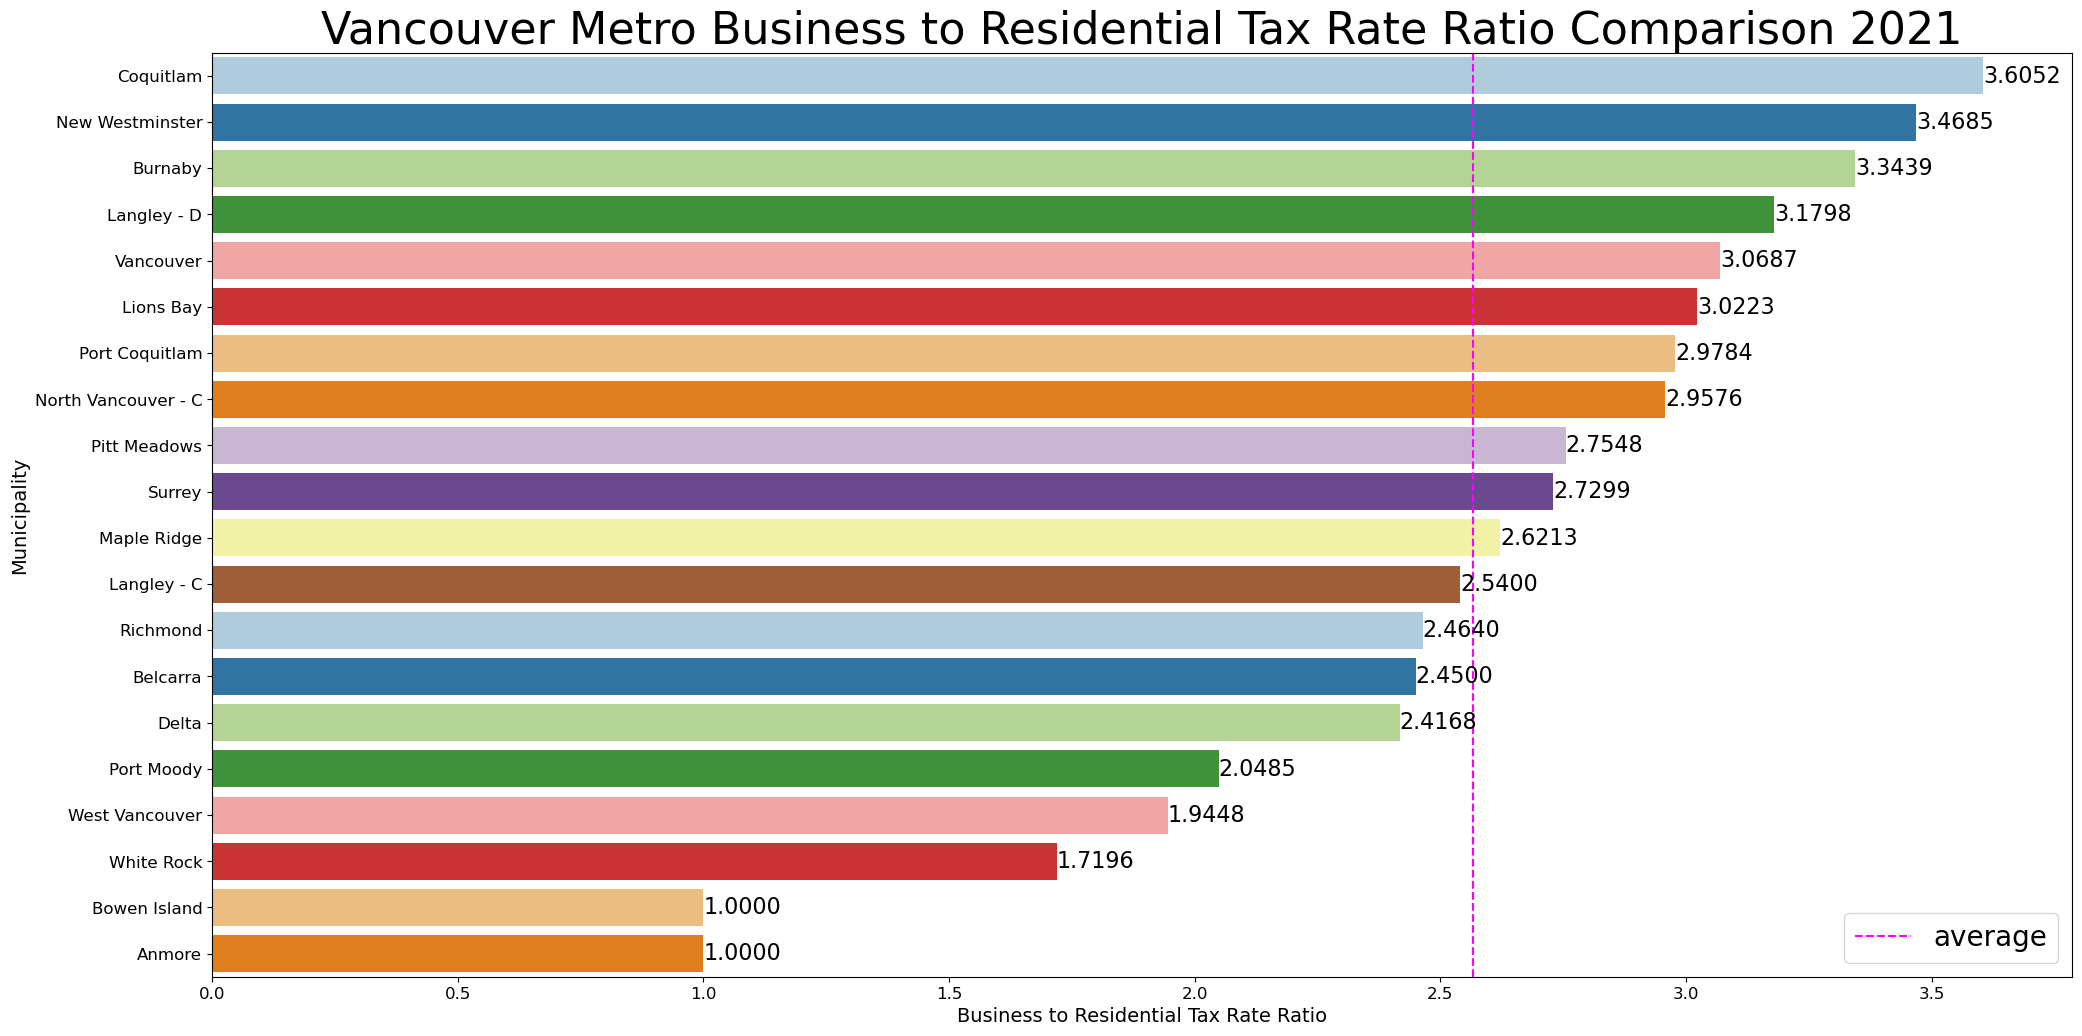

In [46]:
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=vancouver_muni.sort_values(by='TaxRatio Bus/Res', ascending=False), y='Municipality', x='TaxRatio Bus/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Business to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Business to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(vancouver_muni['TaxRatio Bus/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

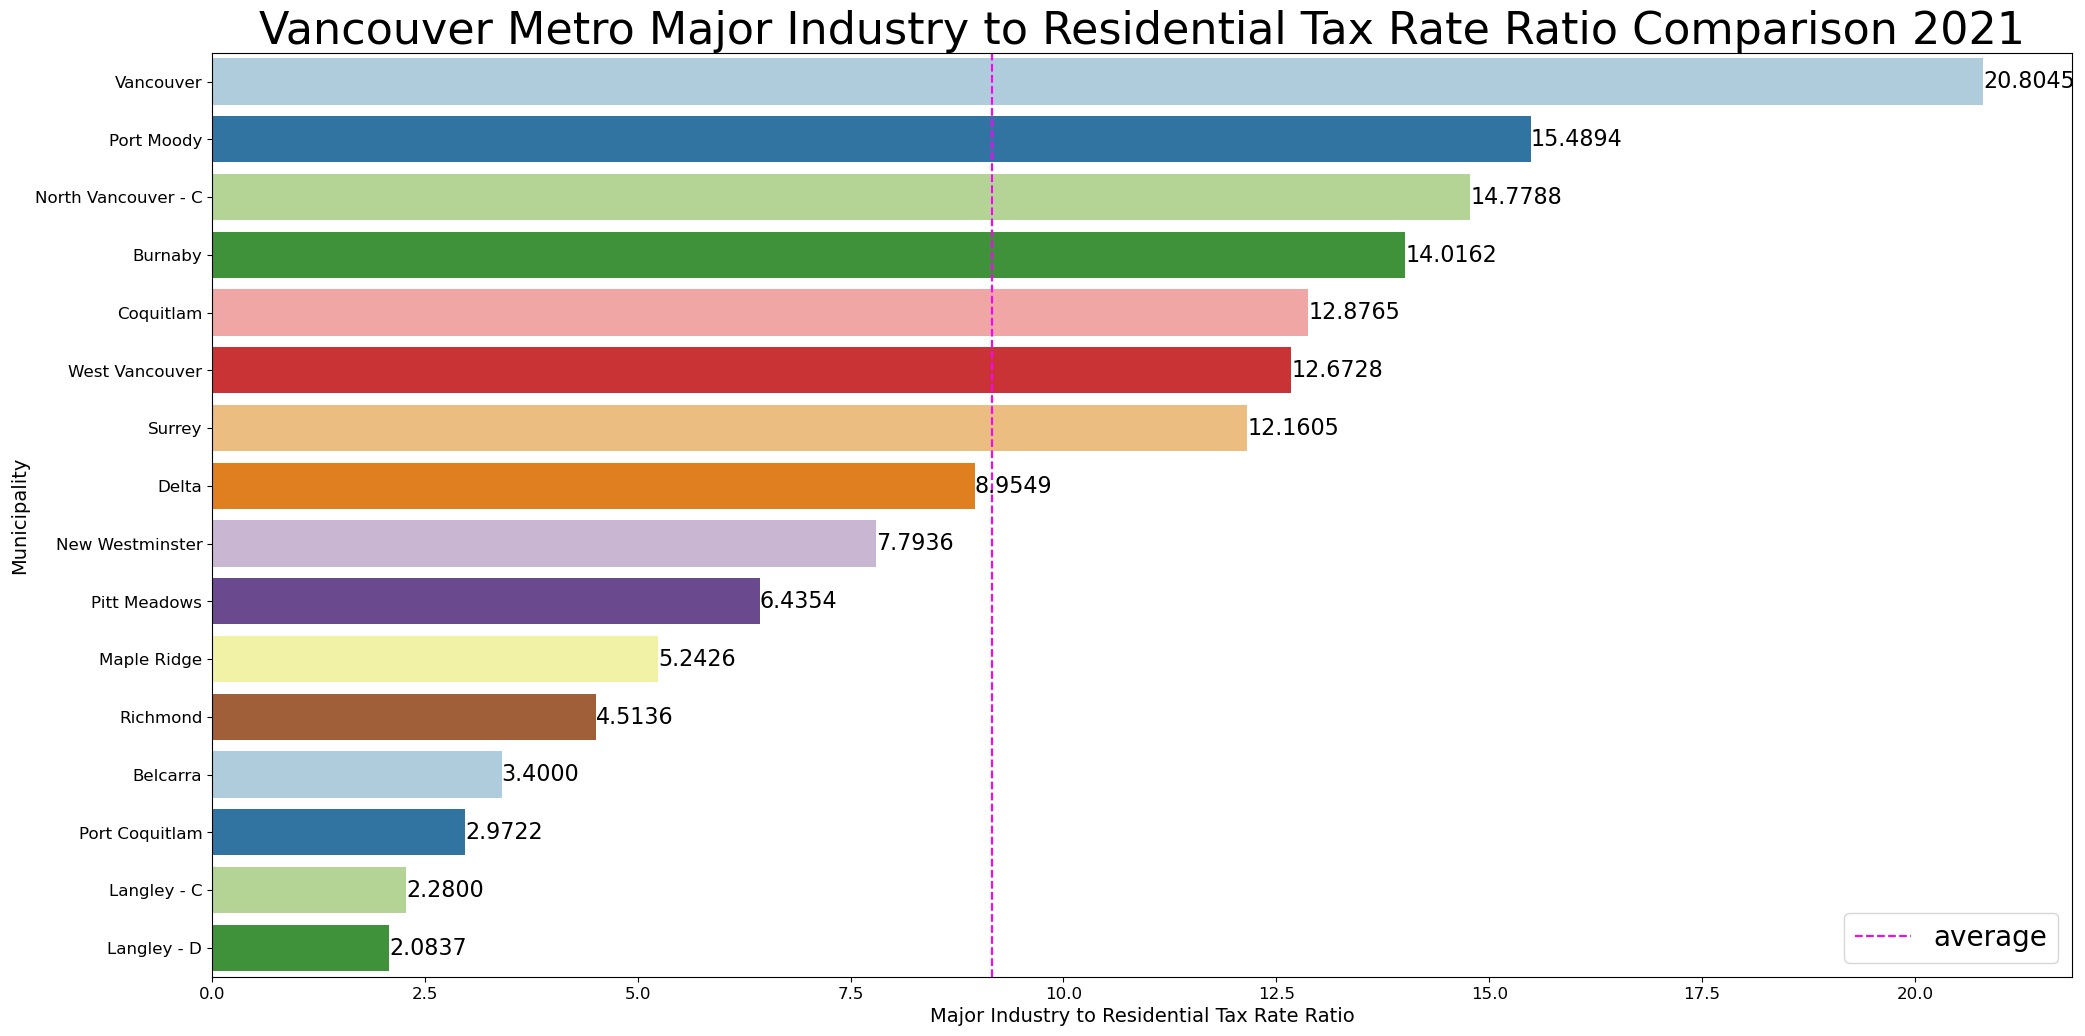

In [47]:
data = vancouver_muni[~vancouver_muni.isin(nonMind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='TaxRatio MajInd/Res', ascending=False), y='Municipality', x='TaxRatio MajInd/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Major Industry to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Major Industry to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['TaxRatio MajInd/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

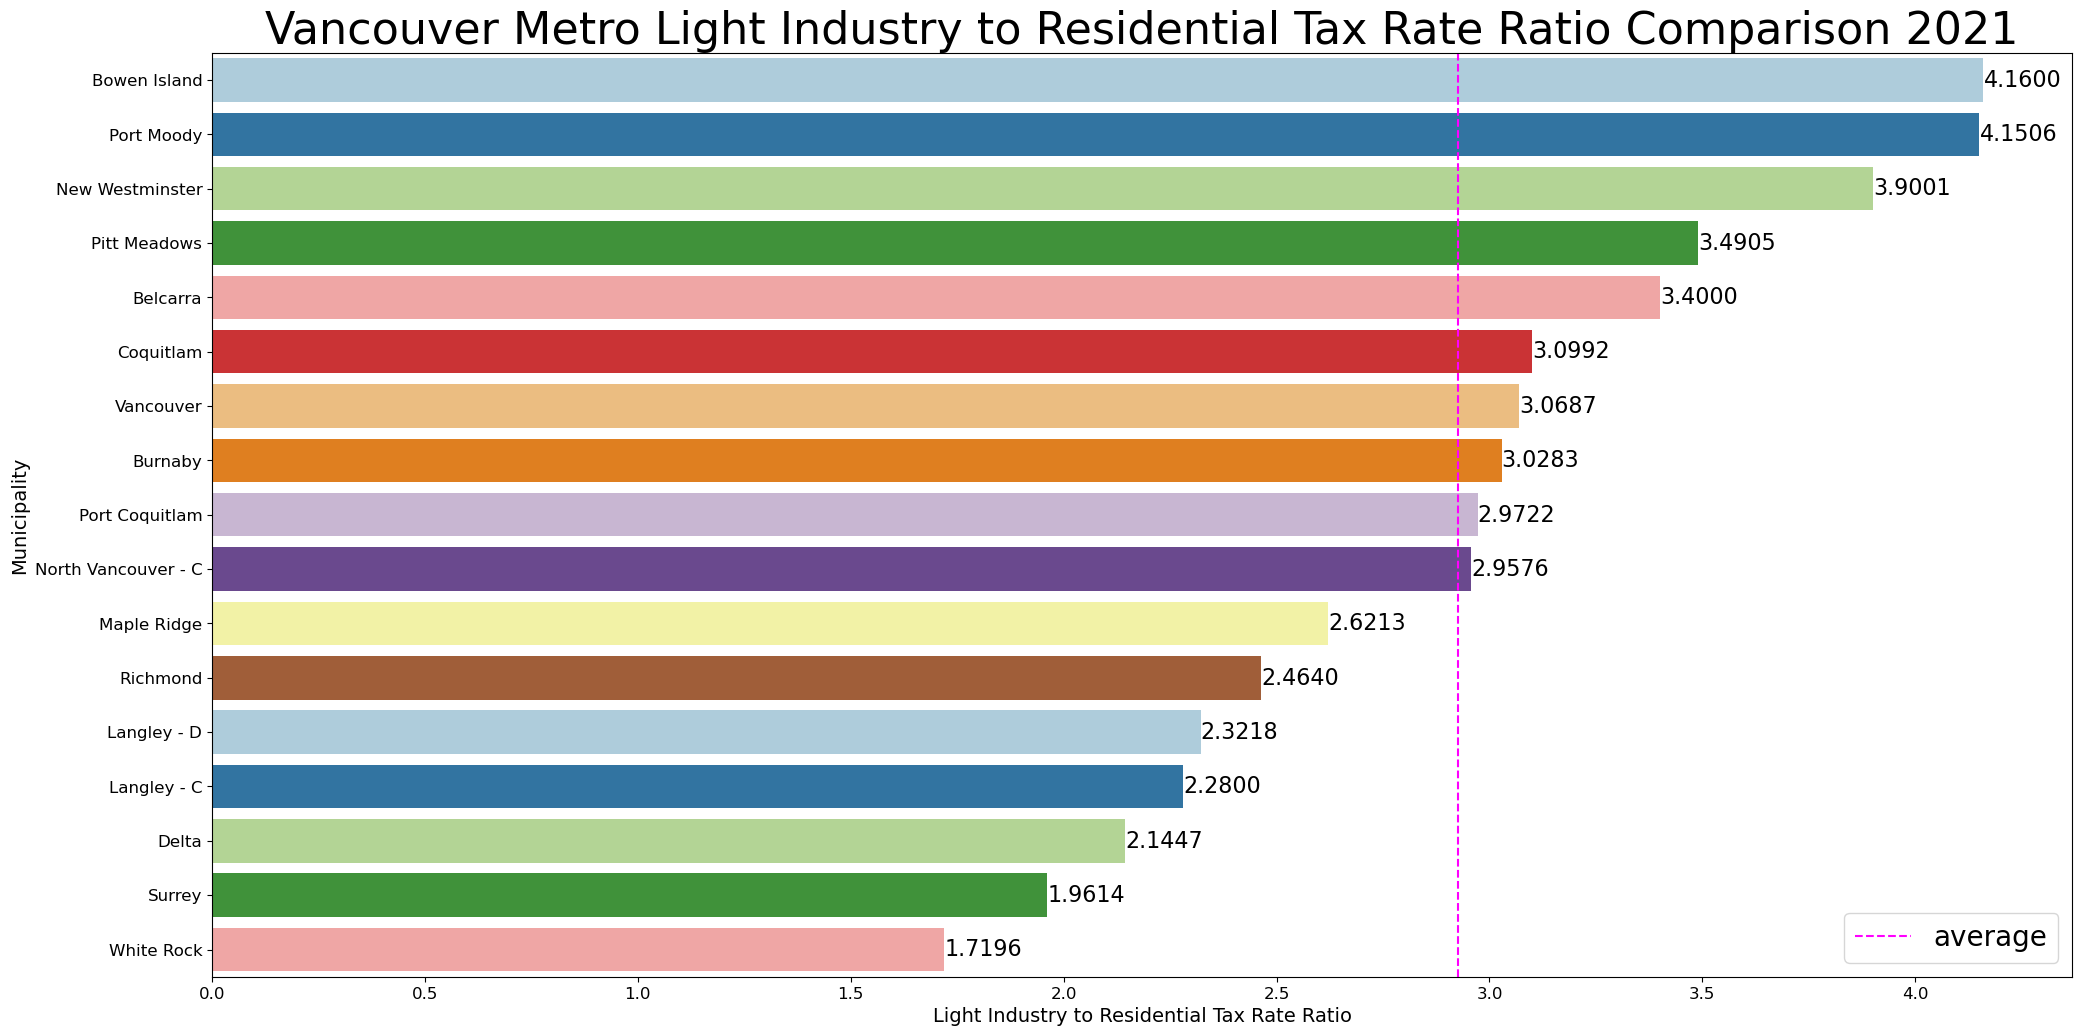

In [48]:
data = vancouver_muni[~vancouver_muni.isin(nonLind)].dropna()
fig, ax = plt.subplots(figsize=(24,12))
fig = sns.barplot(data=data.sort_values(by='TaxRatio LiInd/Res', ascending=False), y='Municipality', x='TaxRatio LiInd/Res', orient='h', palette='Paired', dodge=False)
ax.set_xlabel('Light Industry to Residential Tax Rate Ratio', fontsize=14)
ax.set_ylabel('Municipality', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_title('Vancouver Metro Light Industry to Residential Tax Rate Ratio Comparison 2021', fontsize=32)
ax.bar_label(ax.containers[0], fmt='%.4f', fontsize=16)
plt.axvline(data['TaxRatio LiInd/Res'].mean(), color='magenta', linestyle = 'dashed', label='average')
plt.legend(loc = 'lower right', prop={'size':20})
plt.show()

In [68]:
ab_ptax.shape

(336, 21)

In [49]:
combine_frame = ab_ptax[['Year', 'Municipality', 'ResidentialTotalTax', 'NonResidentialTotalTax', 'FarmTotalTax']].copy()

combine_frame.loc[: ,'PropertyClass'] = 'n'

In [50]:
combine_frame = combine_frame.loc[combine_frame.index.repeat(3),:].reset_index(drop=True)
idx_duplicate_res = combine_frame.duplicated(keep='last')
combine_frame.loc[idx_duplicate_res, 'PropertyClass'] = 'Residential'
combine_frame.loc[combine_frame['PropertyClass'] == 'n','PropertyClass'] = 'Farm'
idx_nonres = combine_frame.duplicated(keep='last')
combine_frame.loc[idx_nonres, 'PropertyClass'] = 'NonResidential'

In [51]:
combine_frame['Rate'] = 'n'
combine_frame.loc[combine_frame['PropertyClass'] == 'Residential', 'Rate'] = combine_frame['ResidentialTotalTax']
combine_frame.loc[combine_frame['PropertyClass'] == 'NonResidential', 'Rate'] = combine_frame['NonResidentialTotalTax']
combine_frame.loc[combine_frame['PropertyClass'] == 'Farm', 'Rate'] = combine_frame['FarmTotalTax']
combine_frame.drop(columns=['ResidentialTotalTax', 'NonResidentialTotalTax', 'FarmTotalTax'], inplace=True)

In [52]:
combine_frame.dropna(subset=['Rate'], inplace=True)
combine_frame['Province'] = 'AB'

In [66]:
bc_ptax.shape

(966, 13)

In [70]:
bc_ptax.head(1)

,Municipality,Type,RD,Purpose of Tax Rate,Residential,Utilities,Supportive Housing,Major Industry,Light Industry,Business,Managed Forest Land,Recreation Non-Profit,Farm
0,100 Mile House,D,CAR,Municipal,0.003692,0.04,0.003692,0.057325,0.010039,0.008184,0.010004,0.003252,0.003748


In [67]:
bc_frame = bc_ptax.loc[bc_ptax['Purpose of Tax Rate'] == 'Totals', :].copy()
bc_frame.loc[:, 'PropertyClass'] = 'n'

In [55]:
bc_frame = bc_frame.loc[bc_frame.index.repeat(3),:].reset_index(drop=True)
idx_duplicate_res = bc_frame.duplicated(keep='last')
bc_frame.loc[idx_duplicate_res, 'PropertyClass'] = 'Residential'
bc_frame.loc[bc_frame['PropertyClass'] == 'n','PropertyClass'] = 'Farm'
idx_nonres = bc_frame.duplicated(keep='last')
bc_frame.loc[idx_nonres, 'PropertyClass'] = 'NonResidential'

In [56]:
bc_frame['Rate'] = 'n'

In [57]:
bc_frame.loc[bc_frame['PropertyClass'] == 'NonResidential', 'Rate'] = bc_frame['Business']
bc_frame.loc[bc_frame['PropertyClass'] == 'Residential', 'Rate'] = bc_frame['Residential']
bc_frame.loc[bc_frame['PropertyClass'] == 'Farm', 'Rate'] = bc_frame['Farm']
bc_frame.drop(columns=['Type', 'RD', 'Purpose of Tax Rate', 'Residential', 'Utilities', 'Supportive Housing', 'Major Industry', 'Light Industry', 'Business', 'Managed Forest Land', 'Recreation Non-Profit', 'Farm'], inplace=True)

In [58]:
bc_frame.tail()

,Municipality,PropertyClass,Rate
478,Williams Lake,Residential,0.011003
479,Williams Lake,Farm,0.02182
480,Zeballos,NonResidential,0.035719
481,Zeballos,Residential,0.019009
482,Zeballos,Farm,0.007337


In [69]:
bc_frame.shape

(161, 14)

In [59]:
bc_frame['Province'] = 'BC'
bc_frame.insert(0, 'Year', 2021)

In [60]:
combine_frame=pd.concat([combine_frame, bc_frame], axis=0)
combine_frame.shape

(1488, 5)

In [61]:
combine_frame.shape

(1488, 5)

In [62]:
combine_frame.reset_index(inplace=True,drop=True)

In [63]:
combine_frame.tail()

,Year,Municipality,PropertyClass,Rate,Province
1483,2021.0,Williams Lake,Residential,0.011003,BC
1484,2021.0,Williams Lake,Farm,0.02182,BC
1485,2021.0,Zeballos,NonResidential,0.035719,BC
1486,2021.0,Zeballos,Residential,0.019009,BC
1487,2021.0,Zeballos,Farm,0.007337,BC


In [74]:
len(combine_frame[combine_frame['Province'] == 'AB'])

1005

In [64]:
os.chdir('data')

In [65]:
files = os.listdir()
if 'AB_BC_2021.csv' in files:
    pass
else:
    combine_frame.to_csv('AB_BC_2021.csv',index=False)